In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot




# Exploratory Data Analysis 

In [11]:
df = pd.read_csv('bm.csv')

In [12]:
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  Unnamed: 2

In [13]:
print(len(df.loc[(df['job']=='unknown')|(df['marital']=='unknown')|(df['education']=='unknown')
                 |(df['default']=='unknown')|(df['housing']=='unknown')|(df['loan']=='unknown')]))


10700


In [14]:
len(df)

41188

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week',
       ...
       'Unnamed: 245', 'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248',
       'Unnamed: 249', 'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252',
       'Unnamed: 253', 'Unnamed: 254'],
      dtype='object', length=255)

# Cleaning the data 

In [16]:
df1 = df.iloc[:, 0:21]

In [17]:
print(df1)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [18]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [19]:
#here we are checking for unique values 
for column in df1:
    unique_values = np.unique(df1[column])
    nr_values = len(unique_values)
    if nr_values:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature age is: 78 -- [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 91 92 94 95 98]
The number of values for feature job is: 12 -- ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
The number of values for feature marital is: 4 -- ['divorced' 'married' 'single' 'unknown']
The number of values for feature education is: 8 -- ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
The number of values for feature default is: 3 -- ['no' 'unknown' 'yes']
The number of values for feature housing is: 3 -- ['no' 'unknown' 'yes']
The number of values for feature loan is: 3 -- ['no' 'unknown' 'yes']
The number of values for feature contact is

# Checking missing values 

In [20]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [21]:
#shows us no missing values 
#if one of the columns had a null values we would check by 
#df1[df1['education'].isnull()]
#this would presents the rows with missing values 

In [22]:
df1.notnull().sum()
#you can see this is the length of datset

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
y                 41188
dtype: int64

# Findings

In [23]:
#to highlight which columns have catergorical features :
cfs=[feature for feature in df1.columns if ((df1[feature].dtypes=='O') & (feature not in ['y']))]
cfs

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [24]:
for i in cfs:
    print('{} values found in the feature {}'.format(len(df1[i].unique()),i))

12 values found in the feature job
4 values found in the feature marital
8 values found in the feature education
3 values found in the feature default
3 values found in the feature housing
3 values found in the feature loan
2 values found in the feature contact
10 values found in the feature month
5 values found in the feature day_of_week
3 values found in the feature poutcome


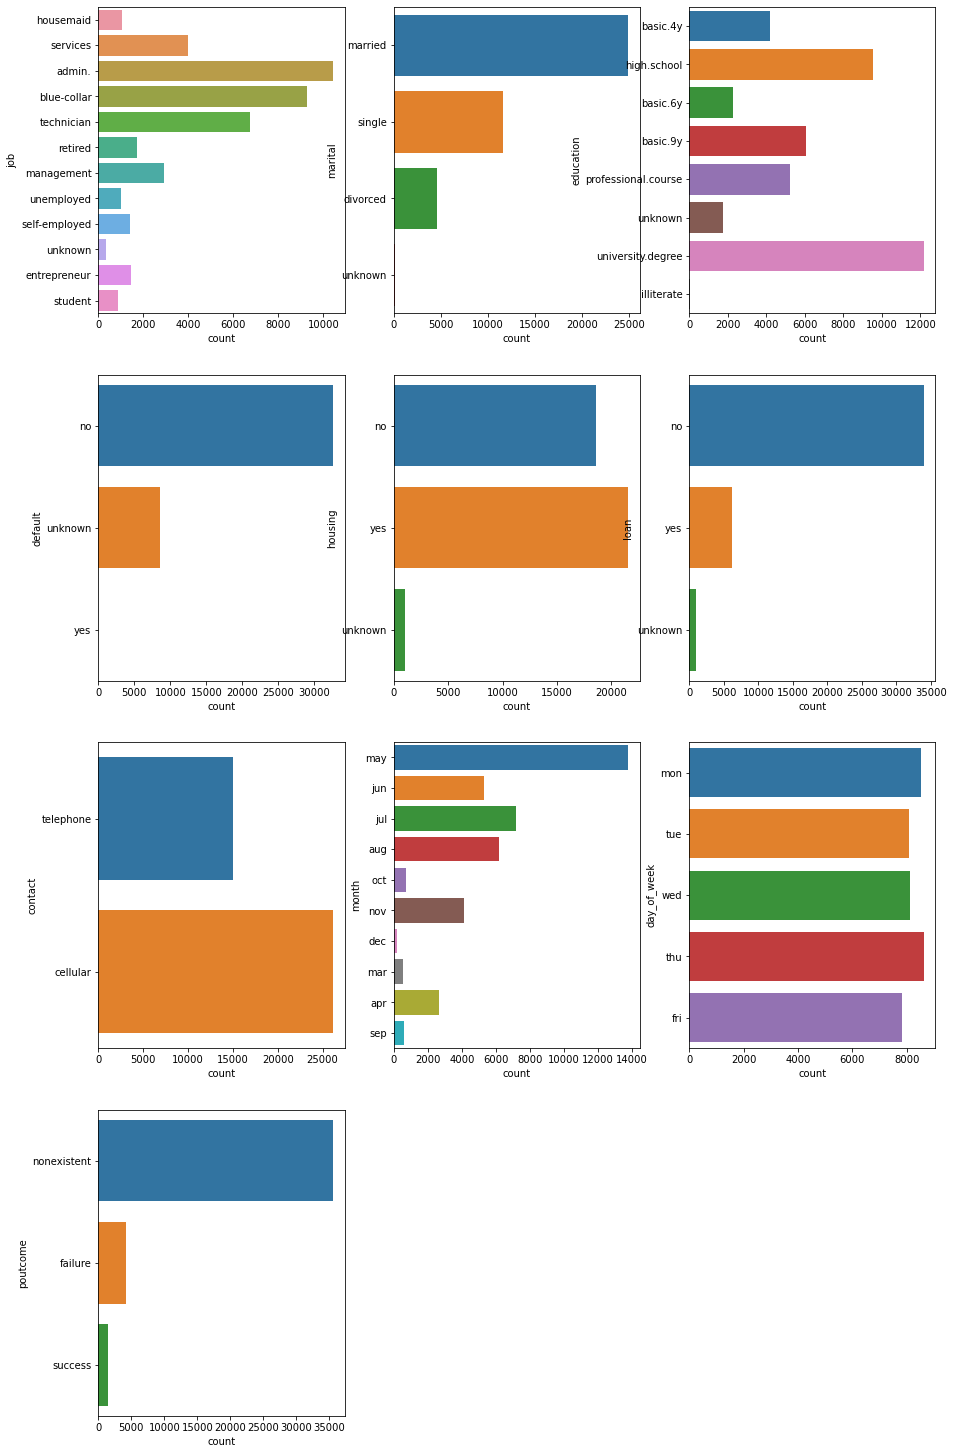

In [25]:
#below graphs shows the distibution 
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for cf in cfs:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cf,data=df1)
    plotnumber+=1
plt.show()

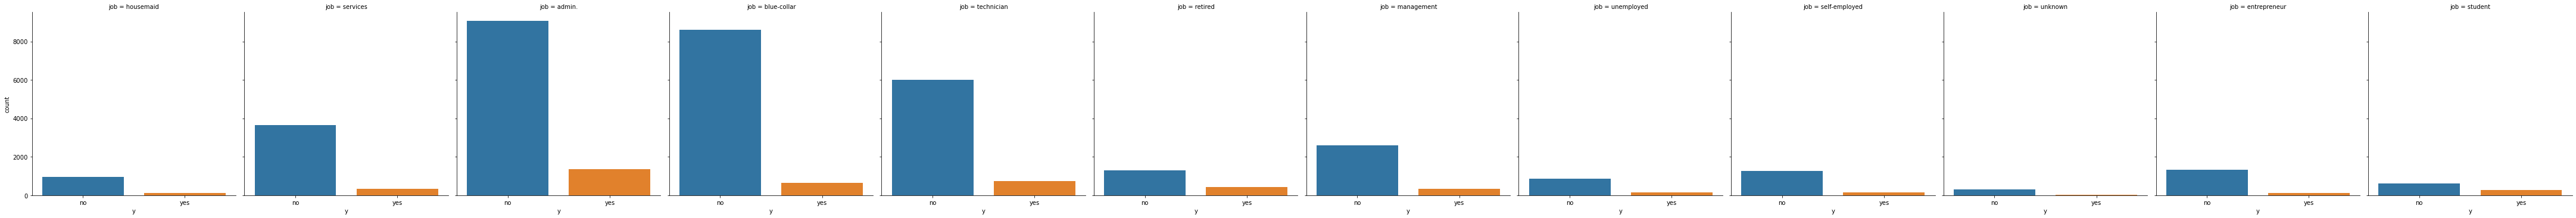

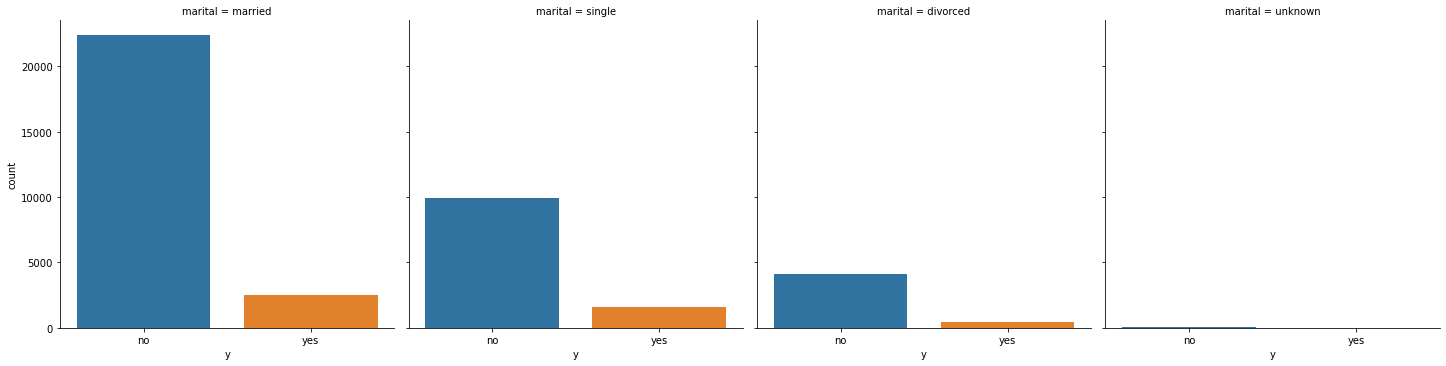

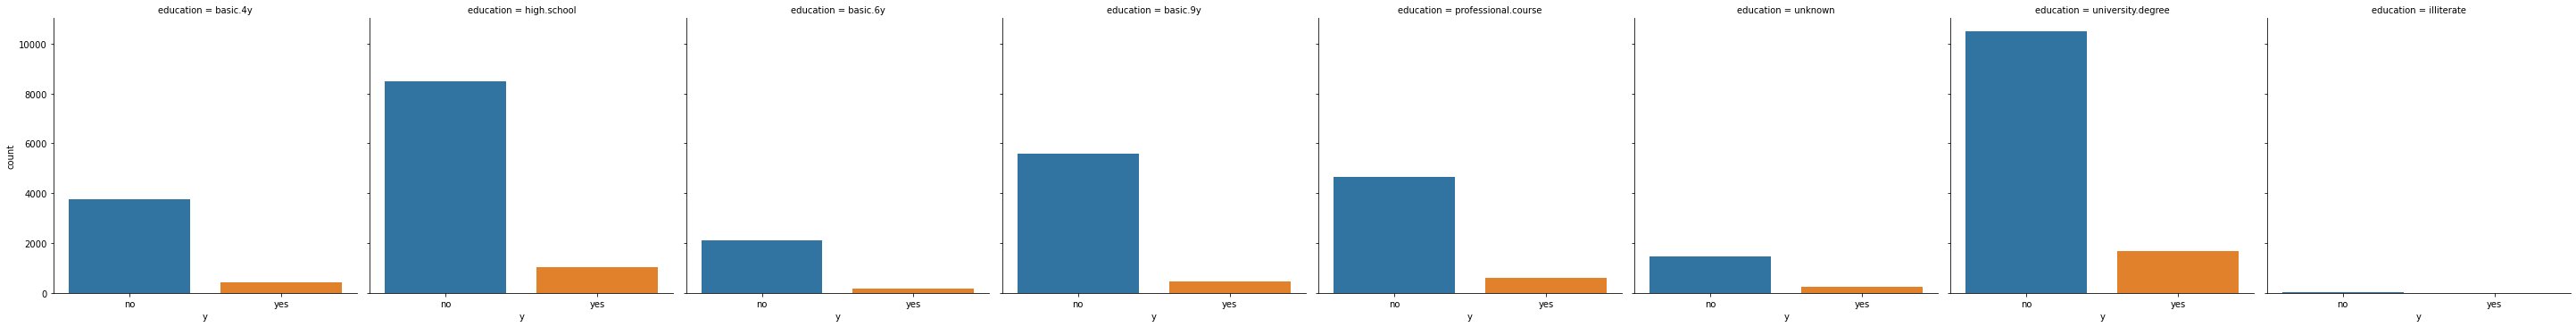

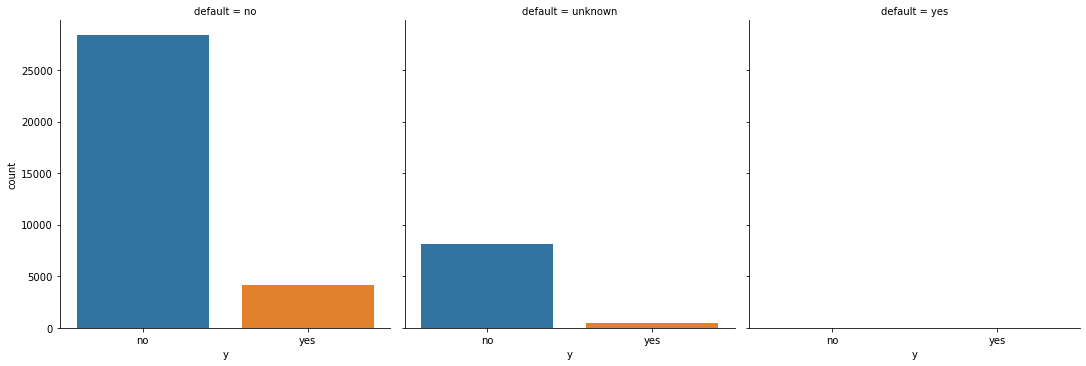

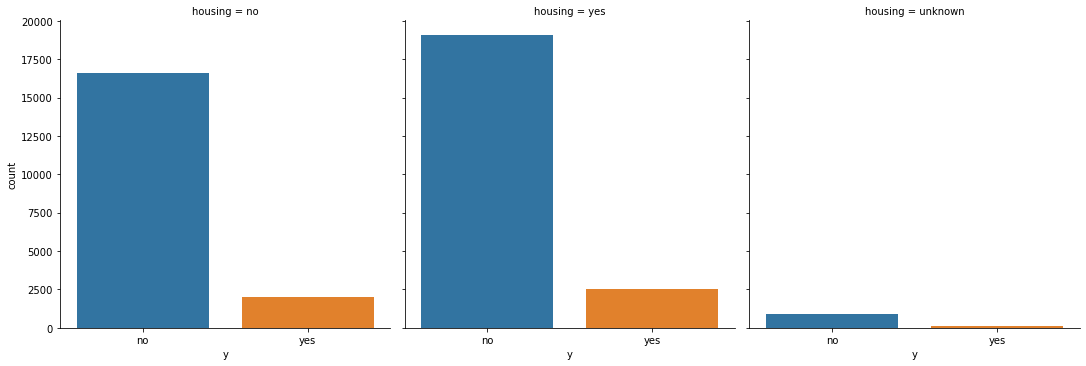

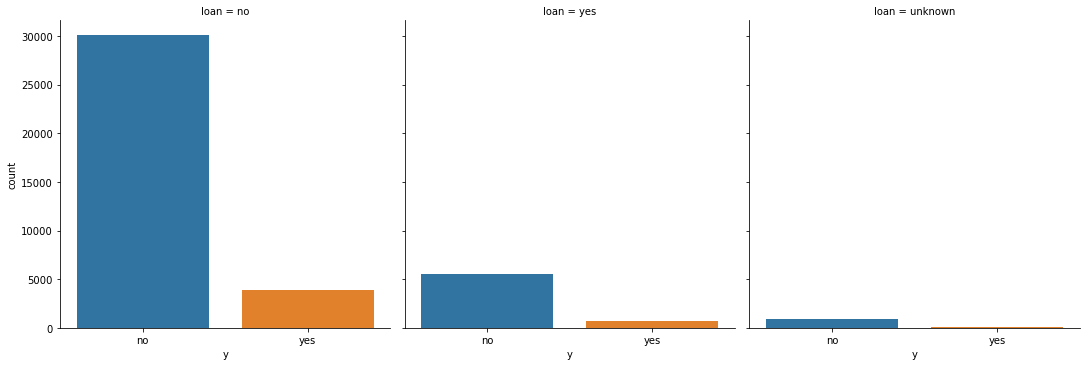

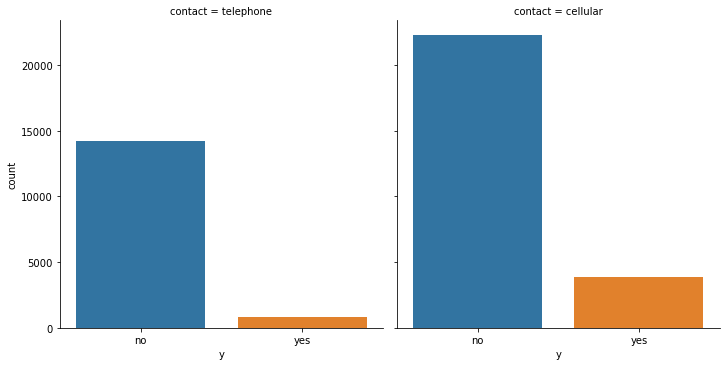

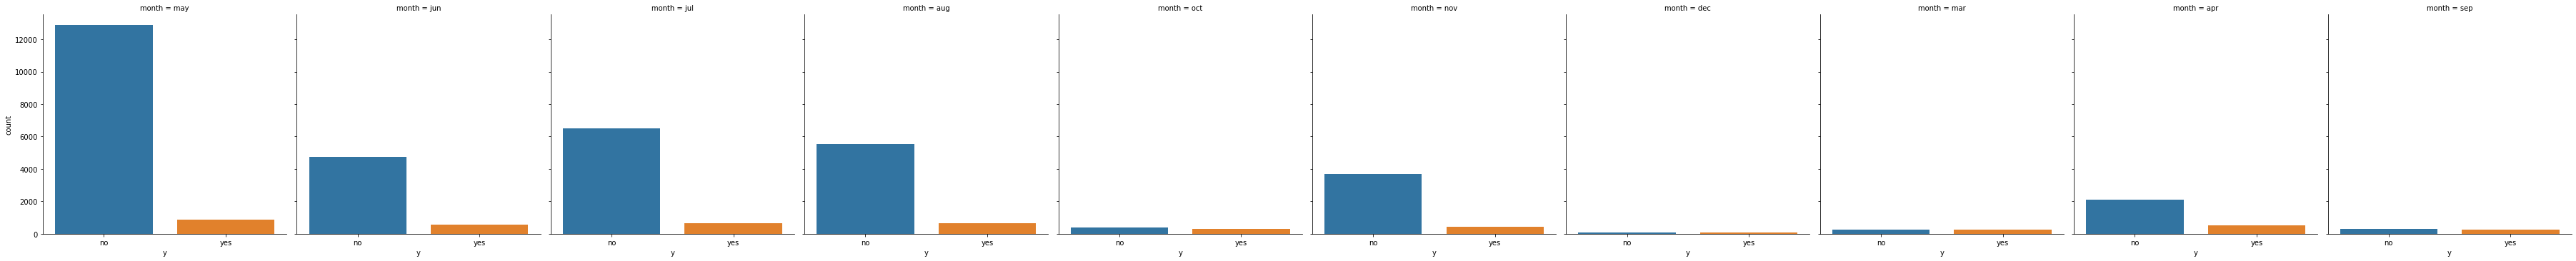

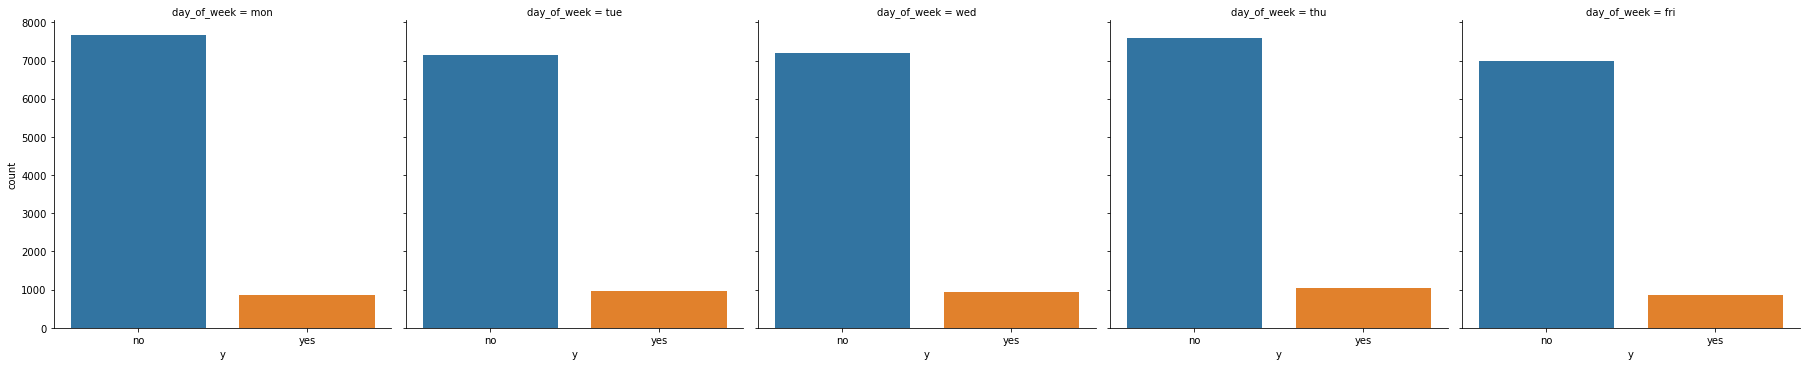

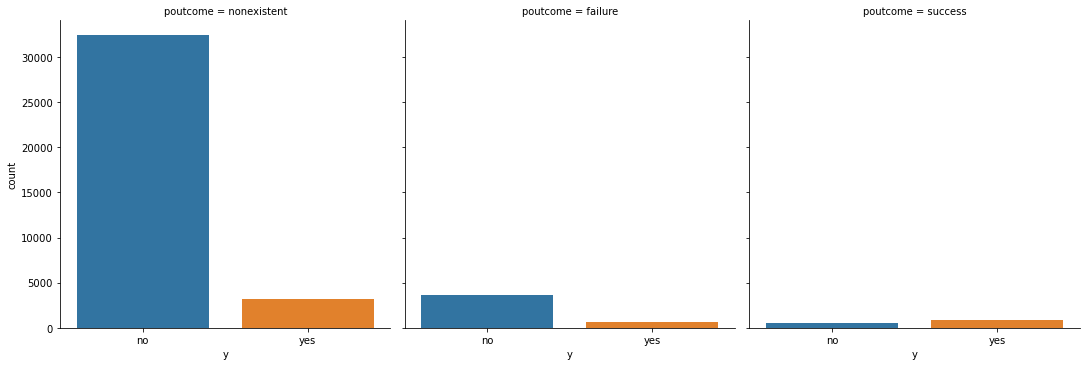

In [26]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable

for cf in cfs:
    sns.catplot(x='y', col=cf, kind='count', data= df1)
plt.show()

In [27]:
for cf in cfs:
    print(df1.groupby(['y',cf]).size())
    #this gives us a response per column for graphs harder to see 


y    job          
no   admin.           9070
     blue-collar      8616
     entrepreneur     1332
     housemaid         954
     management       2596
     retired          1286
     self-employed    1272
     services         3646
     student           600
     technician       6013
     unemployed        870
     unknown           293
yes  admin.           1352
     blue-collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self-employed     149
     services          323
     student           275
     technician        730
     unemployed        144
     unknown            37
dtype: int64
y    marital 
no   divorced     4136
     married     22396
     single       9948
     unknown        68
yes  divorced      476
     married      2532
     single       1620
     unknown        12
dtype: int64
y    education          
no   basic.4y                3748
     basic.6y                2104
     basic.9y   

Now we explore the numerical features 

In [28]:
# list of numerical variables
nf = [feature for feature in df1.columns if ((df1[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(nf))

# visualise the numerical variables
df[nf]

Number of numerical variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


This how we would find discrete values in the code if we had any 


In [29]:
disf=[feature for feature in nf if len(df1[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(df)))
df1[disf]

Discrete Variables Count: 41188


,previous,emp.var.rate,nr.employed
0,0,1.1,5191.0
1,0,1.1,5191.0
2,0,1.1,5191.0
3,0,1.1,5191.0
4,0,1.1,5191.0
...,...,...,...
41183,0,-1.1,4963.6
41184,0,-1.1,4963.6
41185,0,-1.1,4963.6
41186,0,-1.1,4963.6


In [30]:
discrete_feature=[feature for feature in nf if len(df1[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

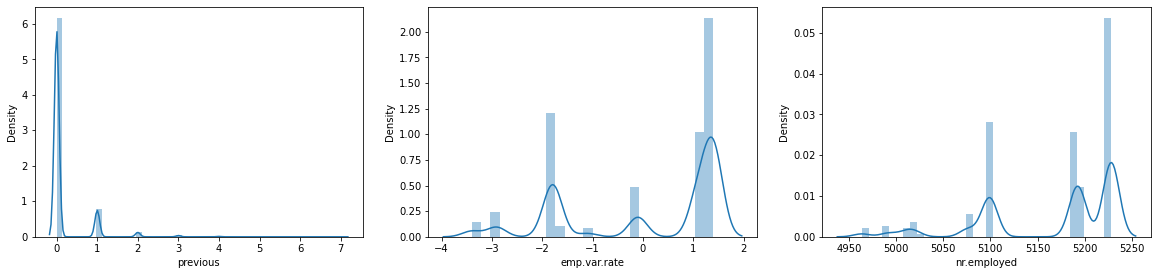

In [31]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for discrete_features in discrete_feature:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df1[discrete_features])
    plotnumber+=1
plt.show()

In [32]:
#we can see previous heavily skewed towards the left 

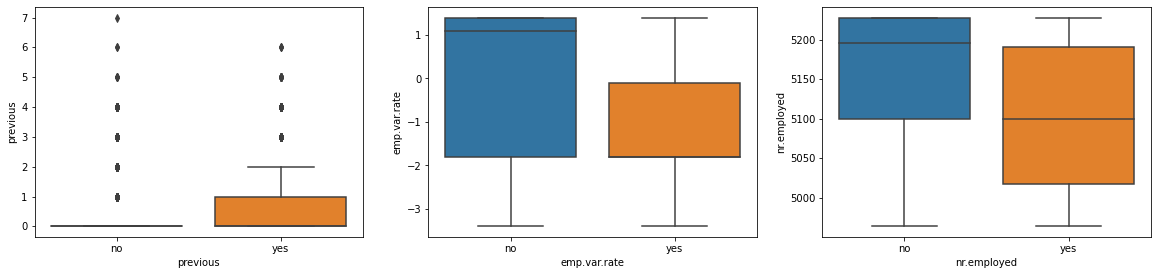

In [33]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in discrete_feature:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df1[feature], data=df1)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [34]:
conf=[feature for feature in nf if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(conf)))

Continuous feature Count 7


/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

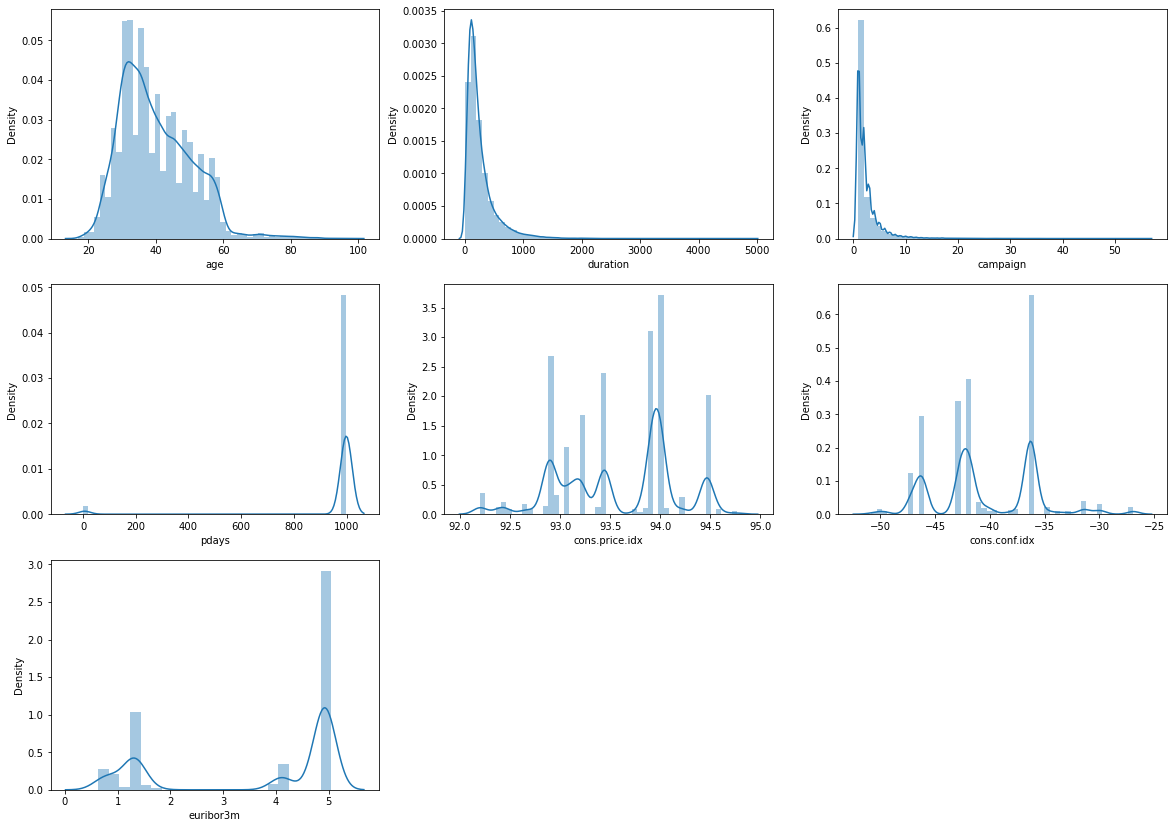

In [35]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in conf:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df1[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

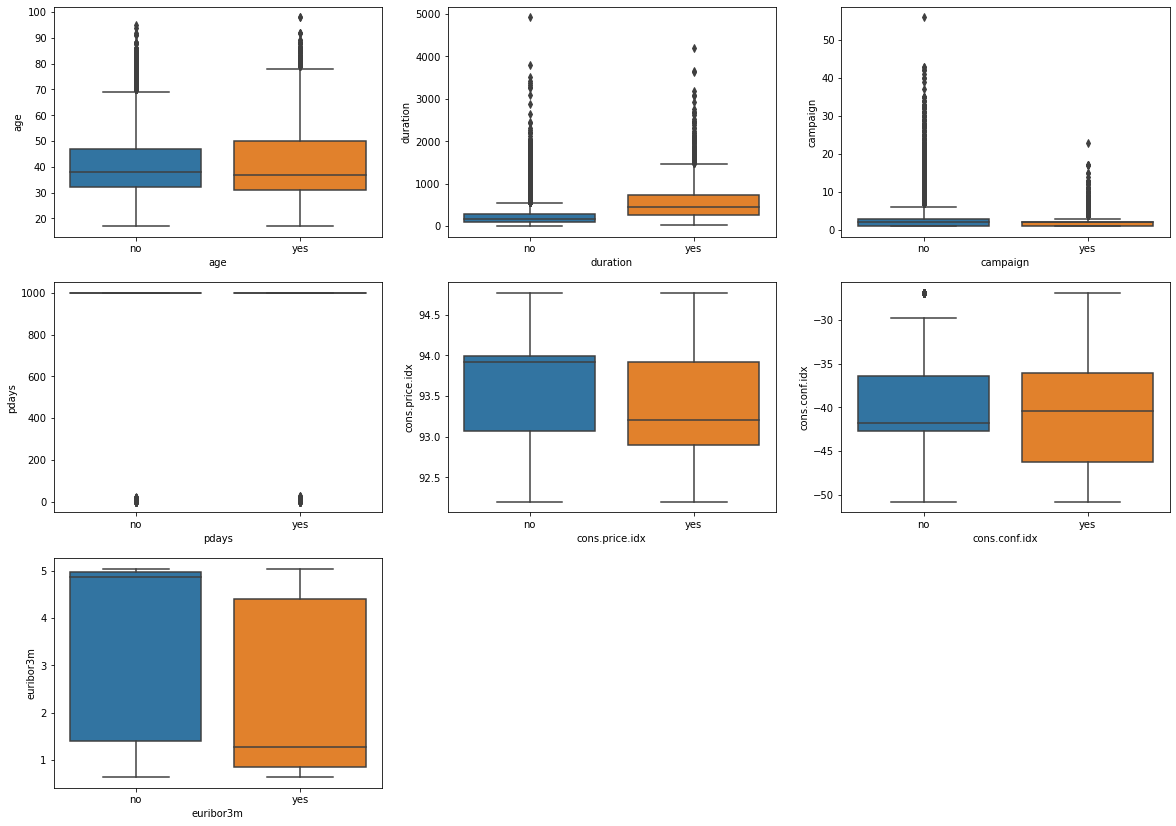

In [36]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in conf:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df1[feature], data=df1)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

Trying to locate outliers 

/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

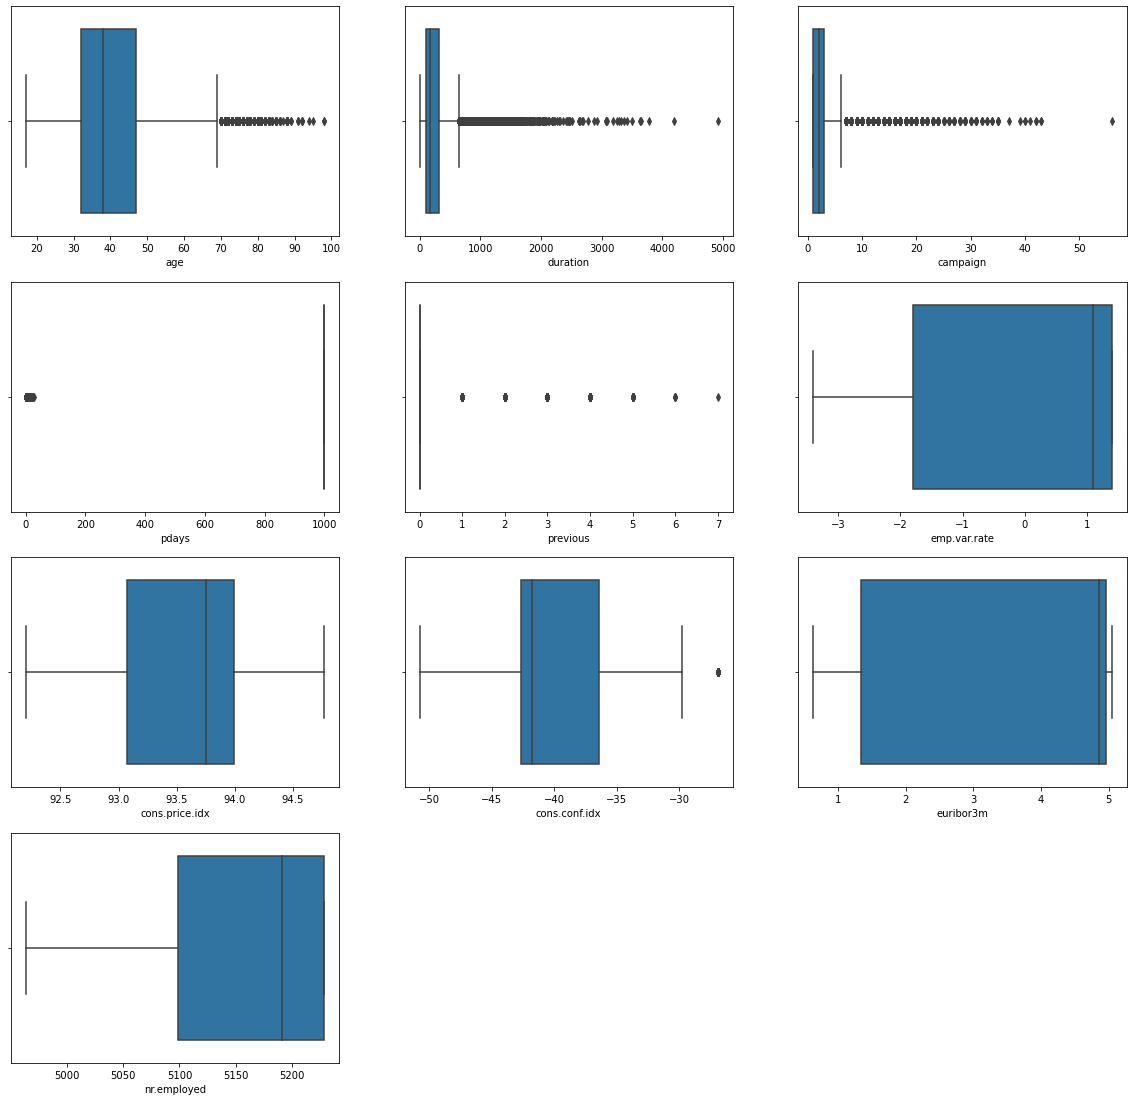

In [37]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in nf:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df1[numerical_feature])
    plotnumber+=1
plt.show()

In [38]:
#seems like age,duration, campaign, previous, p days have outliers 

<AxesSubplot:>

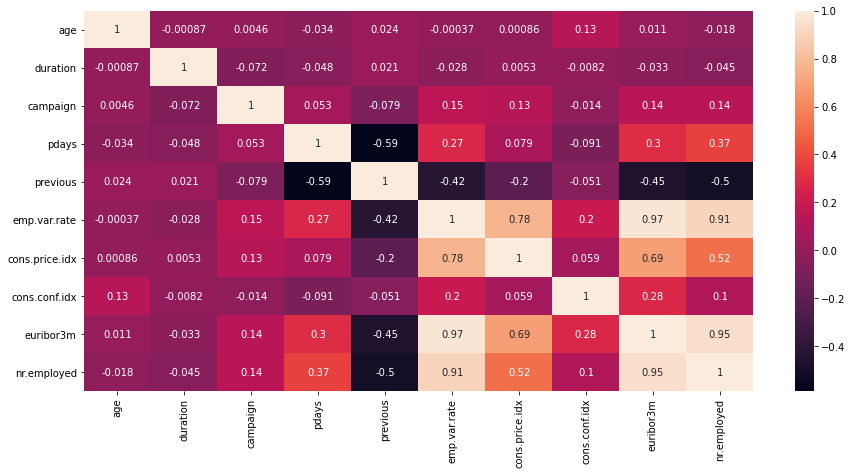

In [39]:
## Checking for correlation
cor=df1.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor,annot=True)

In [40]:
#we can see cons.conf, euribor and nr employed are highly correlated with eachother 
#now we are trying to identify the outliers 

In [41]:
df2 = df1.copy()

In [42]:
df2.groupby(['y','default']).size()

y    default
no   no         28391
     unknown     8154
     yes            3
yes  no          4197
     unknown      443
dtype: int64

In [43]:
#we drop this as the majority of the data is 999 we don't have the value for 
df2.drop(['pdays'],axis=1,inplace=True)

In [44]:
#we know from the above age doesn't have outliers   

In [45]:
df2.groupby(['y','duration']).size()

y    duration
no   0            4
     1            3
     2            1
     3            3
     4           12
                 ..
yes  3094         1
     3183         1
     3631         1
     3643         1
     4199         1
Length: 2562, dtype: int64

In [46]:
# we can see indivduals with the longer duration said yes 

In [47]:
df2.groupby(['y','campaign']).size()
#doesn't seem to be any outliers         

y    campaign
no   1           15342
     2            9359
     3            4767
     4            2402
     5            1479
     6             904
     7             591
     8             383
     9             266
     10            213
     11            165
     12            122
     13             88
     14             68
     15             49
     16             51
     17             54
     18             33
     19             26
     20             30
     21             24
     22             17
     23             15
     24             15
     25              8
     26              8
     27             11
     28              8
     29             10
     30              7
     31              7
     32              4
     33              4
     34              3
     35              5
     37              1
     39              1
     40              2
     41              1
     42              2
     43              2
     56              1
yes  1            23

In [48]:
df2.groupby(['y','previous']).size()
#doesn't seem to be any outliers 

y    previous
no   0           32422
     1            3594
     2             404
     3              88
     4              32
     5               5
     6               2
     7               1
yes  0            3141
     1             967
     2             350
     3             128
     4              38
     5              13
     6               3
dtype: int64

Undersampling 

In [49]:
df2['y']=df2['y'].apply(lambda y:1 if y=='yes' else 0)

In [50]:
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [51]:
x = df2.drop('y',axis=1).copy()
y = df2['y'].copy()


In [52]:
x_encoded=pd.get_dummies(x,columns=['job','marital','education','default','housing'
                           ,'loan','contact','month','day_of_week','poutcome'],drop_first=True)
x_encoded

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,1,0,0,0,0,0,0,1,0


# Checking for class imbalance

y
no     36548
yes     4640
Name: y, dtype: int64

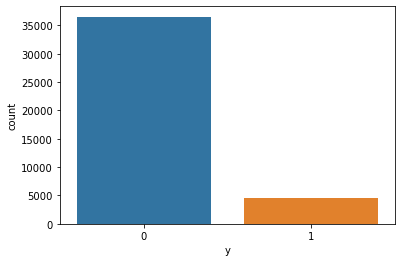

In [53]:
sns.countplot(x='y', data=df2)
df2['y'].groupby(df1['y']).count()
#the data is not balanced 

# Standardising the data


In [54]:
X_train, X_test,y_train,y_test = train_test_split(x_encoded,y,random_state=42)
print(X_train)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

       age  duration  campaign  previous  emp.var.rate  cons.price.idx  \
549     50       153         1         0           1.1          93.994   
1974    26       213         4         0           1.1          93.994   
20992   34        85         3         0           1.4          93.444   
1730    30       322         1         0           1.1          93.994   
26913   29       341         2         0          -0.1          93.200   
...    ...       ...       ...       ...           ...             ...   
6265    58       427         2         0           1.1          93.994   
11284   37       288         1         0           1.4          94.465   
38158   35       194         1         1          -3.4          92.431   
860     40       295         2         0           1.1          93.994   
15795   29       333         2         0           1.4          93.918   

       cons.conf.idx  euribor3m  nr.employed  job_blue-collar  ...  month_may  \
549            -36.4      4.85

#SVM wasn't that accurate lets try improve cross validation to optimise the parameters
param_grid = [{'C':[0.5,1,10,100],
               'gamma':['scale',1,0.1,0.01,0.001,0.0001],
               'kernel':['rbf']},]

optimal_params = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=0)
optimal_params.fit(X_train_scaled,y_trai n)
print(optimal_params.best_params_)

#now 
clf_svm = SVC(random_state=42,C=100,gamma=0.001)
clf_svm.fit(X_train_scaled,y_train)

plot_confusion_matrix(clf_svm,X_test_scaled,y_test,values_format='d',
                      display_labels=["Didn't subscribed","Subscribed"])



Normalising 
from sklearn import preprocessing
names = dummy.columns
g = preprocessing.normalize(X_train)
normalised_x_train = pd.DataFrame(g, columns=names)
normalised_x_train
f = preprocessing.normalize(X_test)
normalised_x_test = pd.DataFrame(f, columns=names)



# 3 classifcation models 

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, neighbors, model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1159
           1       0.85      0.88      0.87      1161

    accuracy                           0.87      2320
   macro avg       0.87      0.87      0.87      2320
weighted avg       0.87      0.87      0.87      2320

[[ 983  176]
 [ 136 1025]]
AUC: 0.8655022781675669


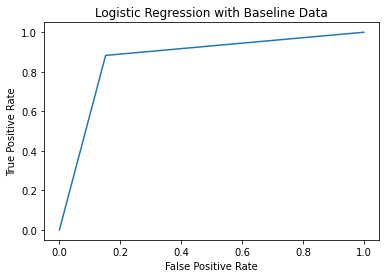

In [219]:
logmodel = LogisticRegression()
logmodel.fit(X_test_scaled,y_test)
predict = logmodel.predict(X_test_scaled)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))
print("AUC:",roc_auc_score(y_test,predict))

fpr, tpr, _ = roc_curve(y_test, predict)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('Logistic Regression with Baseline Data')
pyplot.show()

              precision    recall  f1-score   support

           0       0.73      0.80      0.77      1159
           1       0.78      0.71      0.74      1161

    accuracy                           0.75      2320
   macro avg       0.76      0.75      0.75      2320
weighted avg       0.76      0.75      0.75      2320

[[932 227]
 [342 819]]
AUC: 0.7547839289416831


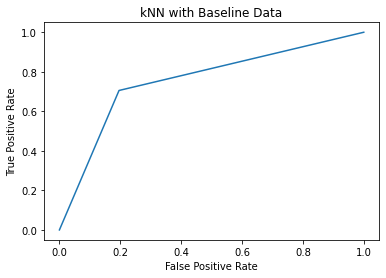

In [218]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_scaled,y_train)
pred = clf.predict(X_test_scaled)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print("AUC:",roc_auc_score(y_test,pred))

fpr, tpr, _ = roc_curve(y_test, pred)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('kNN with Baseline Data')
pyplot.show()

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1159
           1       0.84      0.91      0.87      1161

    accuracy                           0.87      2320
   macro avg       0.87      0.87      0.87      2320
weighted avg       0.87      0.87      0.87      2320

AUC: 0.868931234342475


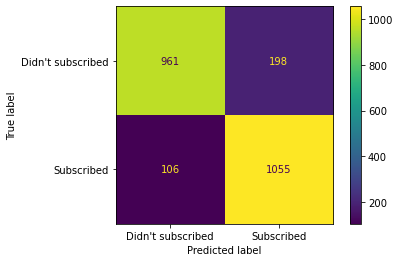

In [210]:
# building svm
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)

plot_confusion_matrix(clf_svm,X_test_scaled,y_test,values_format='d',
                      display_labels=["Didn't subscribed","Subscribed"])

pred=clf_svm.predict(X_test_scaled)
print(classification_report(y_test,pred))
print("AUC:",roc_auc_score(y_test,pred))





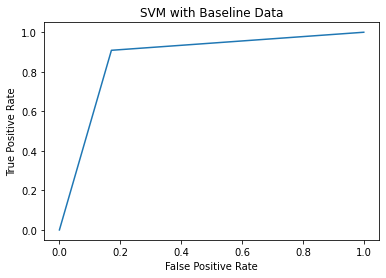

In [217]:
fpr, tpr, _ = roc_curve(y_test, pred)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('SVM with Baseline Data')
pyplot.show()



In [61]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1159
           1       0.85      0.92      0.88      1161

    accuracy                           0.88      2320
   macro avg       0.88      0.88      0.88      2320
weighted avg       0.88      0.88      0.88      2320

[[ 964  195]
 [  92 1069]]
AUC: 0.8762547385959709


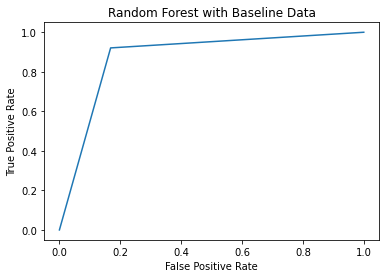

In [216]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
predict_rf = rf.predict(X_test_scaled)
print(classification_report(y_test,predict_rf))
print(confusion_matrix(y_test,predict_rf))
print("AUC:",roc_auc_score(y_test,predict_rf))

fpr, tpr, _ = roc_curve(y_test, predict_rf)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('Random Forest with Baseline Data')
pyplot.show()



              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1159
           1       0.81      0.80      0.81      1161

    accuracy                           0.81      2320
   macro avg       0.81      0.81      0.81      2320
weighted avg       0.81      0.81      0.81      2320

[[938 221]
 [230 931]]
AUC: 0.8056066480429904


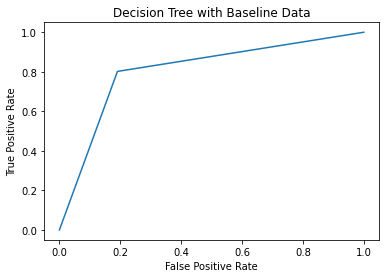

In [215]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled,y_train)
predict_tree = tree_model.predict(X_test_scaled)
print(classification_report(y_test,predict_tree))
print(confusion_matrix(y_test,predict_tree))
print("AUC:",roc_auc_score(y_test,predict_tree))

fpr, tpr, _ = roc_curve(y_test, predict_tree)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('Decision Tree with Baseline Data')
pyplot.show()



/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1159
           1       0.84      0.91      0.87      1161

    accuracy                           0.87      2320
   macro avg       0.87      0.87      0.87      2320
weighted avg       0.87      0.87      0.87      2320

[[ 966  193]
 [ 109 1052]]
AUC: 0.8697962766024648


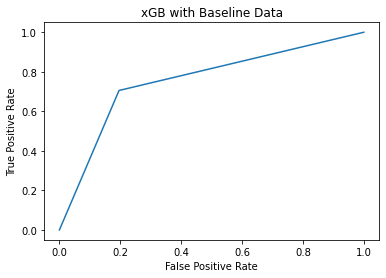

In [220]:
xgb=XGBClassifier()
xgb.fit(X_train_scaled, y_train)
predict_xgb = xgb.predict(X_test_scaled)
print(classification_report(y_test,predict_xgb))
print(confusion_matrix(y_test,predict_xgb))
print("AUC:",roc_auc_score(y_test,predict_xgb))

fpr, tpr, _ = roc_curve(y_test, pred)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('xGB with Baseline Data')
pyplot.show()



# Dealing with the class imbalance using SMOTE 


In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(x_encoded,y)

In [67]:
print(f'''Shape of X before SMOTE: {x_encoded.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (41188, 52)
Shape of X after SMOTE: (73096, 52)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: y, dtype: float64

In [68]:
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      9167
           1       0.94      0.93      0.94      9107

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274

[[8648  519]
 [ 641 8466]]
AUC: 0.9364992295697268


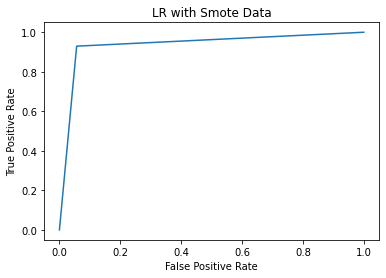

In [223]:
logmodel = LogisticRegression()
logmodel.fit(X_test_scaled_sm,y_test_sm)
predict = logmodel.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
print("AUC:",roc_auc_score(y_test_sm,predict))

fpr, tpr, _ = roc_curve(y_test_sm, predict)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('LR with Smote Data')
pyplot.show()



              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.94      0.91      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8630  537]
 [ 776 8331]]
AUC: 0.9281055661184079


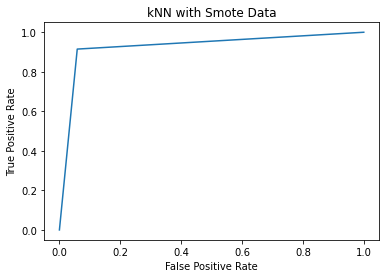

In [226]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_scaled_sm,y_train_sm)
pred = clf.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,pred))
print(confusion_matrix(y_test_sm,pred))
print("AUC:",roc_auc_score(y_test_sm,pred))

fpr, tpr, _ = roc_curve(y_test_sm, pred)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('kNN with Smote Data')
pyplot.show()



              precision    recall  f1-score   support

           0       0.93      0.95      0.94      9167
           1       0.95      0.93      0.94      9107

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274

AUC: 0.9400868807362055


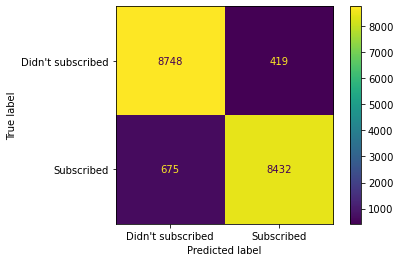

In [252]:

clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled_sm,y_train_sm)

plot_confusion_matrix(clf_svm,X_test_scaled_sm,y_test_sm,values_format='d',
                      display_labels=["Didn't subscribed","Subscribed"])

pred=clf_svm.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,pred))
print("AUC:",roc_auc_score(y_test_sm,pred))





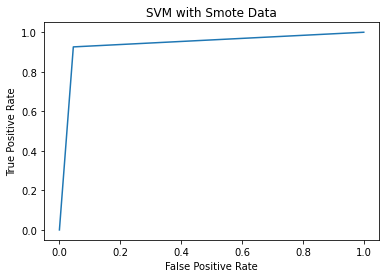

In [232]:
fpr, tpr, _ = roc_curve(y_test_sm, pred)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('SVM with Smote Data')
pyplot.show()


              precision    recall  f1-score   support

           0       0.97      0.91      0.94      9167
           1       0.91      0.97      0.94      9107

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274

[[8334  833]
 [ 284 8823]]
AUC: 0.9389728870855278


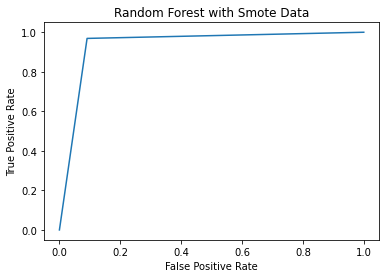

In [233]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled_sm,y_train_sm)
predict_rf = rf.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict_rf))
print(confusion_matrix(y_test_sm,predict_rf))
print("AUC:",roc_auc_score(y_test_sm,predict_rf))

fpr, tpr, _ = roc_curve(y_test_sm, predict_rf)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('Random Forest with Smote Data')
pyplot.show()



              precision    recall  f1-score   support

           0       0.92      0.71      0.80      9167
           1       0.76      0.93      0.84      9107

    accuracy                           0.82     18274
   macro avg       0.84      0.82      0.82     18274
weighted avg       0.84      0.82      0.82     18274

[[6524 2643]
 [ 604 8503]]
AUC: 0.8226803012687397


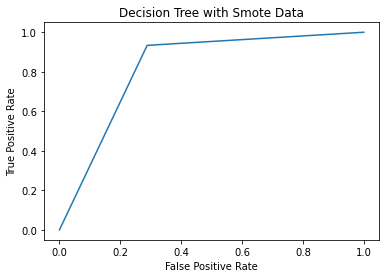

In [235]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled_sm,y_train_sm)
predict_tree = tree_model.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict_tree))
print(confusion_matrix(y_test_sm,predict_tree))
print("AUC:",roc_auc_score(y_test_sm,predict_tree))

fpr, tpr, _ = roc_curve(y_test_sm, predict_tree)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('Decision Tree with Smote Data')
pyplot.show()





/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      9167
           1       0.90      0.97      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8151 1016]
 [ 313 8794]]
AUC: 0.9273992500275712


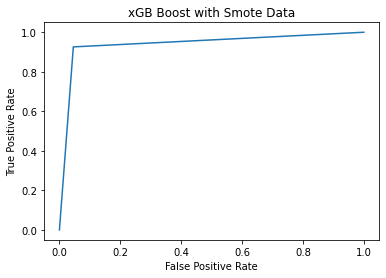

In [253]:
xgb=XGBClassifier()
xgb.fit(X_train_scaled_sm, y_train_sm)
predict_xgb = xgb.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict_xgb))
print(confusion_matrix(y_test_sm,predict_xgb))

fpr, tpr, _ = roc_curve(y_test_sm, pred)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('xGB Boost with Smote Data')
print("AUC:",roc_auc_score(y_test_sm,predict_xgb))
pyplot.show()



# Dealing with the class imbalance using undersampling 

In [78]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [79]:
undersample = RandomUnderSampler()
steps = [("u",undersample)]
pipeline = Pipeline(steps=steps)
X,y1=pipeline.fit_resample(x_encoded,y)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1159
           1       0.85      0.88      0.87      1161

    accuracy                           0.87      2320
   macro avg       0.87      0.87      0.87      2320
weighted avg       0.87      0.87      0.87      2320

[[ 983  176]
 [ 136 1025]]
AUC: 0.8655022781675669


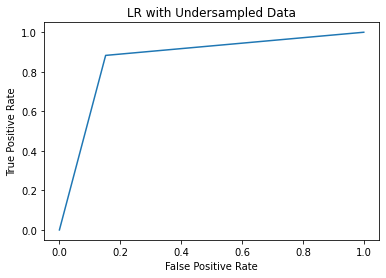

In [238]:
X_train, X_test,y_train,y_test = train_test_split(X,y1,random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
logmodel = LogisticRegression()
logmodel.fit(X_test_scaled,y_test)
predict = logmodel.predict(X_test_scaled)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))
print("AUC:",roc_auc_score(y_test,predict))

fpr, tpr, _ = roc_curve(y_test, predict)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('LR with Undersampled Data')
pyplot.show()



              precision    recall  f1-score   support

           0       0.73      0.80      0.77      1159
           1       0.78      0.71      0.74      1161

    accuracy                           0.75      2320
   macro avg       0.76      0.75      0.75      2320
weighted avg       0.76      0.75      0.75      2320

[[932 227]
 [342 819]]
AUC: 0.7547839289416831


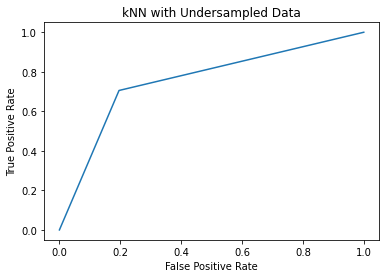

In [239]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_scaled,y_train)
pred = clf.predict(X_test_scaled)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print("AUC:",roc_auc_score(y_test,pred))

fpr, tpr, _ = roc_curve(y_test, pred)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('kNN with Undersampled Data')
pyplot.show()



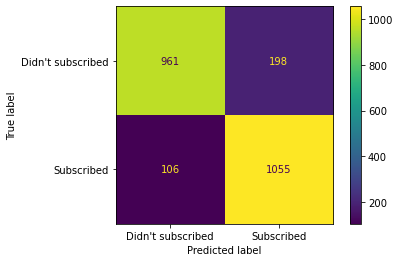

In [241]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)

plot_confusion_matrix(clf_svm,X_test_scaled,y_test,values_format='d',
                      display_labels=["Didn't subscribed","Subscribed"])

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1159
           1       0.84      0.91      0.87      1161

    accuracy                           0.87      2320
   macro avg       0.87      0.87      0.87      2320
weighted avg       0.87      0.87      0.87      2320

AUC: 0.868931234342475


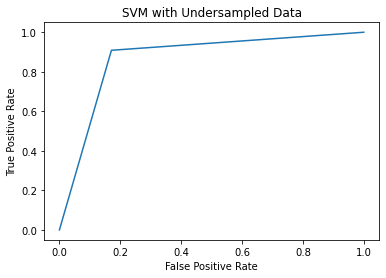

In [247]:
pred=clf_svm.predict(X_test_scaled)
print(classification_report(y_test,pred))
print("AUC:",roc_auc_score(y_test,pred))

fpr, tpr, _ = roc_curve(y_test, pred)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('SVM with Undersampled Data')
pyplot.show()



              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1159
           1       0.85      0.92      0.88      1161

    accuracy                           0.88      2320
   macro avg       0.88      0.88      0.88      2320
weighted avg       0.88      0.88      0.88      2320

[[ 966  193]
 [  88 1073]]
AUC: 0.8788402042510436


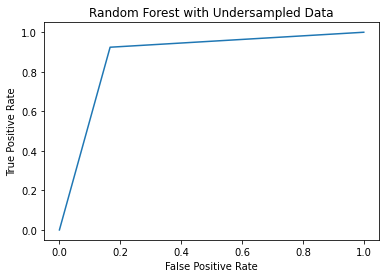

In [249]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
predict_rf = rf.predict(X_test_scaled)
print(classification_report(y_test,predict_rf))
print(confusion_matrix(y_test,predict_rf))
print("AUC:",roc_auc_score(y_test,predict_rf))

fpr, tpr, _ = roc_curve(y_test, predict_rf)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('Random Forest with Undersampled Data')
pyplot.show()



              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1159
           1       0.80      0.78      0.79      1161

    accuracy                           0.79      2320
   macro avg       0.79      0.79      0.79      2320
weighted avg       0.79      0.79      0.79      2320

[[933 226]
 [250 911]]
AUC: 0.7948363516917001


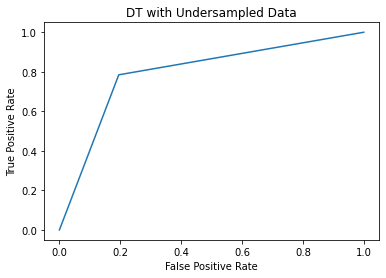

In [250]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)
predict_tree = tree_model.predict(X_test_scaled)
print(classification_report(y_test,predict_tree))
print(confusion_matrix(y_test,predict_tree))
print("AUC:",roc_auc_score(y_test,predict_tree))

fpr, tpr, _ = roc_curve(y_test, predict_tree)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('DT with Undersampled Data')
pyplot.show()



/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:24:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1159
           1       0.84      0.91      0.87      1161

    accuracy                           0.87      2320
   macro avg       0.87      0.87      0.87      2320
weighted avg       0.87      0.87      0.87      2320

[[ 966  193]
 [ 109 1052]]
AUC: 0.8697962766024648


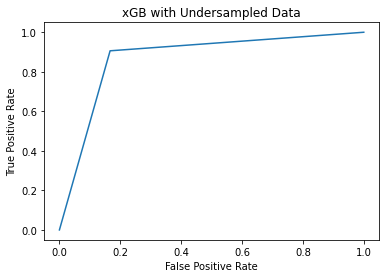

In [251]:
xgb=XGBClassifier()
xgb.fit(X_train_scaled, y_train)
predict_xgb = xgb.predict(X_test_scaled)
print(classification_report(y_test,predict_xgb))
print(confusion_matrix(y_test,predict_xgb))
print("AUC:",roc_auc_score(y_test,predict_xgb))

fpr, tpr, _ = roc_curve(y_test, predict_xgb)
pyplot.plot(fpr, tpr, linestyle='solid')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('xGB with Undersampled Data')
pyplot.show()


In [87]:
#you can see undersamping doesn't produce the best result 

# Feautre selection Chi Squared distribution


In [88]:
#we know SMOTE produces the best result in our dataset

In [89]:
from scipy import stats
job_y_ct=pd.crosstab(index=df2['job'],columns=df2['y'])
(chi2,p,dof,_) = stats.chi2_contingency([job_y_ct.values])
print("chi2 :",chi2)
print("p :",p)
print("degrees for freedom:",dof)

chi2 : 961.2424403289555
p : 4.189763287563623e-199
degrees for freedom: 11


In [90]:
marital_y_ct=pd.crosstab(index=df2['marital'],columns=df2['y'])
marital_y_ct
(chi2,p,dof,_) = stats.chi2_contingency([marital_y_ct])
print("chi2 :",chi2)
print("p :",p)
print("degrees for freedom:",dof)

chi2 : 122.65515182252989
p : 2.068014648442211e-26
degrees for freedom: 3


In [91]:
education_y_ct=pd.crosstab(index=df2['education'],columns=df2['y'])
education_y_ct
(chi2,p,dof,_) = stats.chi2_contingency([education_y_ct])
print("chi2 :",chi2)
print("p :",p)
print("degrees for freedom:",dof)

chi2 : 193.10590454149565
p : 3.3051890144025054e-38
degrees for freedom: 7


In [92]:
housing_y_ct=pd.crosstab(index=df2['housing'],columns=df2['y'])
housing_y_ct
(chi2,p,dof,_) = stats.chi2_contingency([housing_y_ct])
print("chi2 :",chi2)
print("p :",p)
print("degrees for freedom:",dof)

chi2 : 5.684495858974168
p : 0.05829447669453452
degrees for freedom: 2


In [93]:
loan_y_ct=pd.crosstab(index=df2['loan'],columns=df2['y'])
loan_y_ct
(chi2,p,dof,_) = stats.chi2_contingency([loan_y_ct])
print("chi2 :",chi2)
print("p :",p)
print("degrees for freedom:",dof)

chi2 : 1.094027551150338
p : 0.5786752870441754
degrees for freedom: 2


In [94]:
contact_y_ct=pd.crosstab(index=df2['contact'],columns=df2['y'])
contact_y_ct
(chi2,p,dof,_) = stats.chi2_contingency([contact_y_ct])
print("chi2 :",chi2)
print("p :",p)
print("degrees for freedom:",dof)

chi2 : 862.3183642075705
p : 1.5259856523129964e-189
degrees for freedom: 1


In [95]:
month_y_ct=pd.crosstab(index=df2['month'],columns=df2['y'])
month_y_ct
(chi2,p,dof,_) = stats.chi2_contingency([month_y_ct])
print("chi2 :",chi2)
print("p :",p)
print("degrees for freedom:",dof)

chi2 : 3101.149351411678
p : 0.0
degrees for freedom: 9


In [96]:
day_of_week_y_ct=pd.crosstab(index=df2['day_of_week'],columns=df2['y'])
day_of_week_y_ct
(chi2,p,dof,_) = stats.chi2_contingency([day_of_week_y_ct])
print("chi2 :",chi2)
print("p :",p)
print("degrees for freedom:",dof)

chi2 : 26.14493907587197
p : 2.9584820052785324e-05
degrees for freedom: 4


In [97]:
campaign_y_ct=pd.crosstab(index=df2['campaign'],columns=df2['y'])
campaign_y_ct
(chi2,p,dof,_) = stats.chi2_contingency([campaign_y_ct])
print("chi2 :",chi2)
print("p :",p)
print("degrees for freedom:",dof)

chi2 : 218.86337668556095
p : 3.8817543814139657e-26
degrees for freedom: 41


In [98]:
previous_y_ct=pd.crosstab(index=df2['previous'],columns=df2['y'])
previous_y_ct
(chi2,p,dof,_) = stats.chi2_contingency([previous_y_ct])
print("chi2 :",chi2)
print("p :",p)
print("degrees for freedom:",dof)

chi2 : 2299.436359620133
p : 0.0
degrees for freedom: 7


In [99]:
poutcome_y_ct=pd.crosstab(index=df2['poutcome'],columns=df2['y'])
poutcome_y_ct
(chi2,p,dof,_) = stats.chi2_contingency([poutcome_y_ct])
print("chi2 :",chi2)
print("p :",p)
print("degrees for freedom:",dof)

chi2 : 4230.5237978319765
p : 0.0
degrees for freedom: 2


Based on the p values obtained it seems we drop housing and loan 

# Removing correlated features using smote 


              precision    recall  f1-score   support

           0       0.92      0.95      0.93      9167
           1       0.94      0.92      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8671  496]
 [ 731 8376]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      9167
           1       0.94      0.91      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8645  522]
 [ 812 8295]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      9167
           1       0.96      0.92      0.94      9107

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0

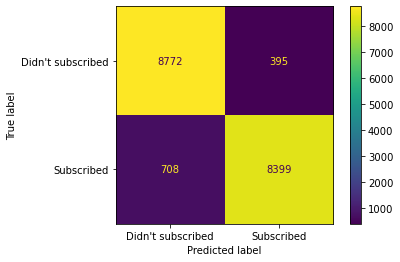

In [100]:
x = df2.drop('y',axis=1).copy()
x = x.drop('euribor3m',axis=1).copy()
x = x.drop('nr.employed',axis=1).copy()
x = x.drop('emp.var.rate',axis=1).copy()
x = x.drop('housing',axis=1).copy()
x = x.drop('loan',axis=1).copy()
y = df2['y'].copy()
x_encoded=pd.get_dummies(x,columns=['job','marital','education','default'
                                    ,'contact','month','day_of_week','poutcome'],drop_first=True)
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(x_encoded,y)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)
logmodel = LogisticRegression()
logmodel.fit(X_test_scaled_sm,y_test_sm)
predict = logmodel.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_scaled_sm,y_train_sm)
pred = clf.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,pred))
print(confusion_matrix(y_test_sm,pred))
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled_sm,y_train_sm)

plot_confusion_matrix(clf_svm,X_test_scaled_sm,y_test_sm,values_format='d',
                      display_labels=["Didn't subscribed","Subscribed"])
pred=clf_svm.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,pred))

In [101]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled_sm,y_train_sm)
predict_rf = rf.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict_rf))
print(confusion_matrix(y_test_sm,predict_rf))

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled_sm,y_train_sm)
predict_tree = tree_model.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict_tree))
print(confusion_matrix(y_test_sm,predict_tree))

xgb=XGBClassifier()
xgb.fit(X_train_scaled_sm,y_train_sm)
predict_xgb = xgb.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict_xgb))
print(confusion_matrix(y_test_sm,predict_xgb))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      9167
           1       0.94      0.95      0.95      9107

    accuracy                           0.95     18274
   macro avg       0.95      0.95      0.95     18274
weighted avg       0.95      0.95      0.95     18274

[[8625  542]
 [ 459 8648]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      9167
           1       0.82      0.93      0.87      9107

    accuracy                           0.86     18274
   macro avg       0.87      0.86      0.86     18274
weighted avg       0.87      0.86      0.86     18274

[[7262 1905]
 [ 605 8502]]
[12:46:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to r

/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.96      0.88      0.92      9167
           1       0.89      0.97      0.93      9107

    accuracy                           0.92     18274
   macro avg       0.93      0.92      0.92     18274
weighted avg       0.93      0.92      0.92     18274

[[8080 1087]
 [ 316 8791]]


# Feature selction mutal info

In [102]:
x = df2.drop('y',axis=1).copy()
y = df2['y'].copy()
x_encoded=pd.get_dummies(x,columns=['job','marital','education','default','housing'
                           ,'loan','contact','month','day_of_week','poutcome'],drop_first=True)
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(x_encoded,y)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)

In [103]:
#constant_filter = VarianceThreshold(threshold=0.01)
#constant_filter.fit(X_train)
#X_train_filter = constant_filter.transform(X_train)
#X_test_filter = constant_filter.transform(X_test)


In [104]:
X_train_T = X_train_scaled_sm.T
X_test_T = X_test_scaled_sm.T
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [105]:
duplicated_features = X_train_T.duplicated()
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T
X_train_unique.shape, X_test_unique.shape

((54822, 51), (18274, 51))

In [106]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train_unique, y_train_sm) 
len(mi)

51

In [107]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns
mi.sort_values(ascending=False, inplace = True)


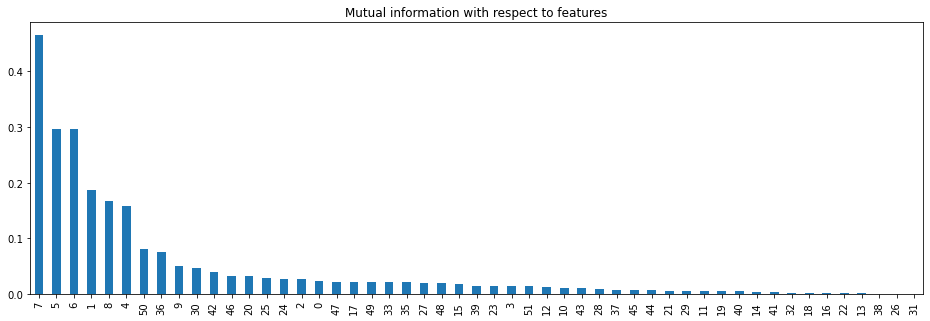

In [108]:
plt.title('Mutual information with respect to features')
mi.plot.bar(figsize = (16,5))
plt.show()

In [109]:
from sklearn.feature_selection import SelectPercentile
sel = SelectPercentile(mutual_info_classif, percentile=20).fit(X_train_unique, y_train_sm)
X_train_unique.columns[sel.get_support()]

Int64Index([1, 4, 5, 6, 7, 8, 9, 30, 36, 50], dtype='int64')

In [110]:
len(X_train_unique.columns[sel.get_support()])


10

In [111]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)
X_train_mi.shape

(54822, 10)

In [293]:

logmodel = LogisticRegression()
logmodel.fit(X_test_mi,y_test_sm)
predict = logmodel.predict(X_test_mi)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
print("AUC:",roc_auc_score(y_test_sm,predict))


              precision    recall  f1-score   support

           0       0.68      0.50      0.57      9167
           1       0.60      0.76      0.67      9107

    accuracy                           0.63     18274
   macro avg       0.64      0.63      0.62     18274
weighted avg       0.64      0.63      0.62     18274

[[4573 4594]
 [2201 6906]]
AUC: 0.6285861823198444


In [294]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_mi,y_train_sm)
pred = clf.predict(X_test_mi)
print(classification_report(y_test_sm,pred))
print(confusion_matrix(y_test_sm,pred))
print("AUC:",roc_auc_score(y_test_sm,pred))


              precision    recall  f1-score   support

           0       0.72      0.69      0.71      9167
           1       0.70      0.73      0.72      9107

    accuracy                           0.71     18274
   macro avg       0.71      0.71      0.71     18274
weighted avg       0.71      0.71      0.71     18274

[[6371 2796]
 [2429 6678]]
AUC: 0.7141375000241066


              precision    recall  f1-score   support

           0       0.65      0.82      0.72      9167
           1       0.75      0.55      0.63      9107

    accuracy                           0.68     18274
   macro avg       0.70      0.68      0.68     18274
weighted avg       0.70      0.68      0.68     18274

AUC: 0.682880359797412


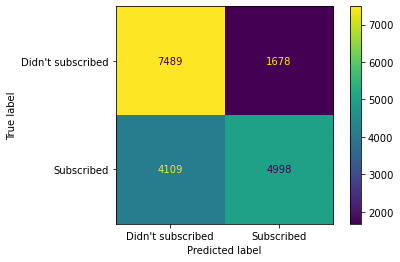

In [295]:

clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_mi,y_train_sm)

plot_confusion_matrix(clf_svm,X_test_mi,y_test_sm,values_format='d',
                      display_labels=["Didn't subscribed","Subscribed"])
pred=clf_svm.predict(X_test_mi)
print(classification_report(y_test_sm,pred))
print("AUC:",roc_auc_score(y_test_sm,pred))


In [302]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled_sm,y_train_sm)
predict_rf = rf.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
print("AUC:",roc_auc_score(y_test_sm,predict_rf))




              precision    recall  f1-score   support

           0       0.68      0.50      0.57      9167
           1       0.60      0.76      0.67      9107

    accuracy                           0.63     18274
   macro avg       0.64      0.63      0.62     18274
weighted avg       0.64      0.63      0.62     18274

[[4573 4594]
 [2201 6906]]
AUC: 0.9300894883058186


In [305]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled_sm,y_train_sm)
predict_tree = tree_model.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
print("AUC:",roc_auc_score(y_test_sm,predict_tree))



              precision    recall  f1-score   support

           0       0.68      0.50      0.57      9167
           1       0.60      0.76      0.67      9107

    accuracy                           0.63     18274
   macro avg       0.64      0.63      0.62     18274
weighted avg       0.64      0.63      0.62     18274

[[4573 4594]
 [2201 6906]]
AUC: 0.8223863822123527


In [303]:
xgb=XGBClassifier()
xgb.fit(X_train_scaled_sm,y_train_sm)
predict_xgb = xgb.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict_xgb))
print(confusion_matrix(y_test_sm,predict_xgb))
print("AUC:",roc_auc_score(y_test_sm,predict_xgb))

/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:37:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      9167
           1       0.90      0.97      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8151 1016]
 [ 313 8794]]
AUC: 0.9273992500275712


In [304]:
#This doesn't produce good results 

# Implementing SMOTE after feature selection using chi

In [125]:
x_chi = df2.drop('y',axis=1).copy()
x_chi = x_chi.drop('housing',axis=1).copy()
x_chi = x_chi.drop('loan',axis=1).copy()
y_chi = df2['y'].copy()

x_encoded_chi=pd.get_dummies(x_chi,columns=['job','marital','education','default'
                                    ,'contact','month','day_of_week','poutcome'],drop_first=True)



In [126]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(x_encoded_chi,y_chi)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)

In [127]:

logmodel = LogisticRegression()
logmodel.fit(X_test_sm,y_test_sm)
predict = logmodel.predict(X_test_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))


              precision    recall  f1-score   support

           0       0.91      0.90      0.91      9167
           1       0.90      0.91      0.91      9107

    accuracy                           0.91     18274
   macro avg       0.91      0.91      0.91     18274
weighted avg       0.91      0.91      0.91     18274

[[8269  898]
 [ 784 8323]]


/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_scaled_sm,y_train_sm)
pred = clf.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,pred))
print(confusion_matrix(y_test_sm,pred))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.93      0.92      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8577  590]
 [ 754 8353]]


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      9167
           1       0.95      0.93      0.94      9107

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274



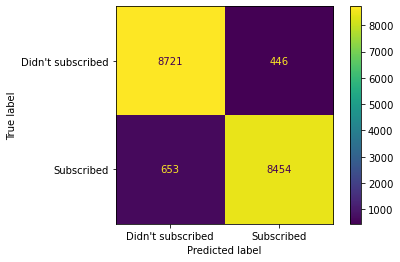

In [129]:

clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled_sm,y_train_sm)

plot_confusion_matrix(clf_svm,X_test_scaled_sm,y_test_sm,values_format='d',
                      display_labels=["Didn't subscribed","Subscribed"])
pred=clf_svm.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,pred))


In [130]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled_sm,y_train_sm)
predict_rf = rf.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled_sm,y_train_sm)
predict_tree = tree_model.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))

xgb=XGBClassifier()
xgb.fit(X_train_scaled_sm,y_train_sm)
predict_xgb = xgb.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict_xgb))
print(confusion_matrix(y_test_sm,predict_xgb))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      9167
           1       0.90      0.91      0.91      9107

    accuracy                           0.91     18274
   macro avg       0.91      0.91      0.91     18274
weighted avg       0.91      0.91      0.91     18274

[[8269  898]
 [ 784 8323]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      9167
           1       0.90      0.91      0.91      9107

    accuracy                           0.91     18274
   macro avg       0.91      0.91      0.91     18274
weighted avg       0.91      0.91      0.91     18274

[[8269  898]
 [ 784 8323]]
[13:05:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to r

/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.96      0.91      0.94      9167
           1       0.92      0.96      0.94      9107

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274

[[8365  802]
 [ 342 8765]]


# PCA with smote chi and dropping correlated features 

In [131]:
x = df2.drop('y',axis=1).copy()
x = x.drop('housing',axis=1).copy()
x = x.drop('loan',axis=1).copy()
x = x.drop('euribor3m',axis=1).copy()
x = x.drop('nr.employed',axis=1).copy()
x = x.drop('emp.var.rate',axis=1).copy()
y = df2['y'].copy()
x_encoded=pd.get_dummies(x,columns=['job','marital','education','default'
                           ,'contact','month','day_of_week','poutcome'],drop_first=True)

x_encoded
sm = SMOTE(random_state=42)
pca = PCA(n_components=35,random_state=42)
X_sm, y_sm = sm.fit_resample(x_encoded,y)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)
pca.fit(X_test_scaled_sm)
pca.explained_variance_ratio_



array([0.06709539, 0.05018697, 0.04138507, 0.03799909, 0.03420568,
       0.03402144, 0.03236981, 0.03108947, 0.02960052, 0.02630564,
       0.02623296, 0.02598016, 0.02571402, 0.02486023, 0.02398856,
       0.02355592, 0.02342719, 0.02322995, 0.02293913, 0.02259268,
       0.02255082, 0.02240566, 0.02210977, 0.02174429, 0.0216767 ,
       0.02136092, 0.0210799 , 0.02069443, 0.01919786, 0.01826067,
       0.0179923 , 0.01676856, 0.01608207, 0.01566088, 0.0148906 ])

In [132]:
X_train_pca=pca.transform(X_train_scaled_sm)
X_test_pca=pca.transform(X_test_scaled_sm)

In [263]:
logmodel = LogisticRegression()
logmodel.fit(X_test_pca,y_test_sm)
predict = logmodel.predict(X_test_pca)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
print("AUC:",roc_auc_score(y_test_sm,predict))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.93      0.92      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8582  585]
 [ 733 8374]]
AUC: 0.927848300849593


In [265]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_pca,y_train_sm)
pred = clf.predict(X_test_pca)
print(classification_report(y_test_sm,pred))
print(confusion_matrix(y_test_sm,pred))
print("AUC:",roc_auc_score(y_test_sm,pred))


              precision    recall  f1-score   support

           0       0.91      0.94      0.93      9167
           1       0.94      0.91      0.92      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8631  536]
 [ 817 8290]]
AUC: 0.9259090938873472


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      9167
           1       0.95      0.92      0.94      9107

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274

AUC: 0.9391538921129782


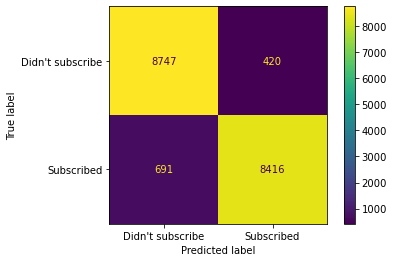

In [266]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_pca,y_train_sm)

plot_confusion_matrix(clf_svm,X_test_pca,y_test_sm,values_format='d',
                      display_labels=["Didn't subscribe","Subscribed"])
pred=clf_svm.predict(X_test_pca)
print(classification_report(y_test_sm,pred))
print("AUC:",roc_auc_score(y_test_sm,pred))

In [267]:
rf = RandomForestClassifier()
rf.fit(X_train_pca,y_train_sm)
predict_rf = rf.predict(X_test_pca)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
print("AUC:",roc_auc_score(y_test_sm,predict_rf))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.93      0.92      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8582  585]
 [ 733 8374]]
AUC: 0.9378322715254129


In [268]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_pca,y_train_sm)
predict_tree = tree_model.predict(X_test_pca)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
print("AUC:",roc_auc_score(y_test_sm,predict_tree))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.93      0.92      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8582  585]
 [ 733 8374]]
AUC: 0.9146365629029484


In [269]:
xgb=XGBClassifier()
xgb.fit(X_train_pca,y_train_sm)
predict_xgb = xgb.predict(X_test_pca)
print(classification_report(y_test_sm,predict_xgb))
print(confusion_matrix(y_test_sm,predict_xgb))
print("AUC:",roc_auc_score(y_test_sm,predict_xgb))

/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:56:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      9167
           1       0.95      0.93      0.94      9107

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274

[[8685  482]
 [ 654 8453]]
AUC: 0.9378036013160818


# PCA with  Mutal information gain and classification with SMOTE,

In [135]:
x = df2.drop('y',axis=1).copy()
#x = x.drop('housing',axis=1).copy()
#x = x.drop('loan',axis=1).copy()
#x = x.drop('euribor3m',axis=1).copy()
#x = x.drop('nr.employed',axis=1).copy()
#x = x.drop('emp.var.rate',axis=1).copy()
y = df2['y'].copy()
x_encoded=pd.get_dummies(x,columns=['job','marital','education','default'
                           ,'contact','month','day_of_week','poutcome','loan','housing'],drop_first=True)
sm = SMOTE(random_state=42)
pca = PCA(n_components=52,whiten='True',random_state=42)
X_sm, y_sm = sm.fit_resample(x_encoded,y)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)
pca.fit(X_test_sm)
X_train_scaled_sm = pca.transform(X_train_scaled_sm)
X_test_scaled_sm = pca.transform(X_test_scaled_sm)
X_train_T = X_train_scaled_sm.T
X_test_T = X_test_scaled_sm.T
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)
duplicated_features = X_train_T.duplicated()
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T
X_train_unique.shape, X_test_unique.shape
mi = mutual_info_classif(X_train_unique, y_train_sm) 
mi = pd.Series(mi)
mi.index = X_train_unique.columns
mi.sort_values(ascending=False, inplace = True)
sel = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train_unique, y_train_sm)
X_train_unique.columns[sel.get_support()]
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)
X_train_mi.shape

(54822, 6)

In [136]:
logmodel = LogisticRegression()
logmodel.fit(X_test_mi,y_test_sm)
predict = logmodel.predict(X_test_mi)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63      9167
           1       0.64      0.77      0.70      9107

    accuracy                           0.67     18274
   macro avg       0.67      0.67      0.66     18274
weighted avg       0.67      0.67      0.66     18274

[[5123 4044]
 [2058 7049]]


In [137]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_mi,y_train_sm)
pred = clf.predict(X_test_mi)
print(classification_report(y_test_sm,pred))
print(confusion_matrix(y_test_sm,pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      9167
           1       0.89      0.88      0.89      9107

    accuracy                           0.89     18274
   macro avg       0.89      0.89      0.89     18274
weighted avg       0.89      0.89      0.89     18274

[[8228  939]
 [1129 7978]]


              precision    recall  f1-score   support

           0       0.65      0.82      0.72      9167
           1       0.75      0.55      0.63      9107

    accuracy                           0.68     18274
   macro avg       0.70      0.68      0.68     18274
weighted avg       0.70      0.68      0.68     18274



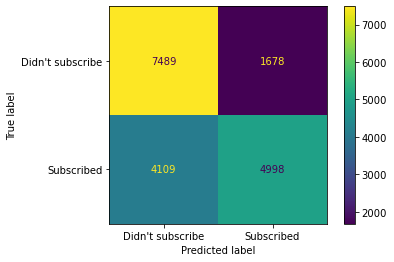

In [173]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_mi,y_train_sm)

plot_confusion_matrix(clf_svm,X_test_mi,y_test_sm,values_format='d',
                      display_labels=["Didn't subscribe","Subscribed"])
pred=clf_svm.predict(X_test_mi)
print(classification_report(y_test_sm,pred))

In [139]:
rf = RandomForestClassifier()
rf.fit(X_train_mi,y_train_sm)
predict_rf = rf.predict(X_test_mi)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_mi,y_train_sm)
predict_tree = tree_model.predict(X_test_mi)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))

xgb=XGBClassifier()
xgb.fit(X_train_mi,y_train_sm)
predict_xgb = xgb.predict(X_test_mi)
print(classification_report(y_test_sm,predict_xgb))
print(confusion_matrix(y_test_sm,predict_xgb))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63      9167
           1       0.64      0.77      0.70      9107

    accuracy                           0.67     18274
   macro avg       0.67      0.67      0.66     18274
weighted avg       0.67      0.67      0.66     18274

[[5123 4044]
 [2058 7049]]
              precision    recall  f1-score   support

           0       0.71      0.56      0.63      9167
           1       0.64      0.77      0.70      9107

    accuracy                           0.67     18274
   macro avg       0.67      0.67      0.66     18274
weighted avg       0.67      0.67      0.66     18274

[[5123 4044]
 [2058 7049]]
[13:11:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to r

/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9167
           1       0.92      0.88      0.90      9107

    accuracy                           0.91     18274
   macro avg       0.91      0.91      0.91     18274
weighted avg       0.91      0.91      0.91     18274

[[8499  668]
 [1061 8046]]


# PCA with Mutal information gain and classification with SMOTE, chi and no correlation

In [140]:
x = df2.drop('y',axis=1).copy()
x = x.drop('housing',axis=1).copy()
x = x.drop('loan',axis=1).copy()
x = x.drop('euribor3m',axis=1).copy()
x = x.drop('nr.employed',axis=1).copy()
x = x.drop('emp.var.rate',axis=1).copy()
y = df2['y'].copy()
x_encoded=pd.get_dummies(x,columns=['job','marital','education','default'
                           ,'contact','month','day_of_week','poutcome',],drop_first=True)
sm = SMOTE(random_state=42)
pca = PCA(n_components=4,whiten='True',random_state=42)
X_sm, y_sm = sm.fit_resample(x_encoded,y)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)
pca.fit(X_test_sm)
X_train_scaled_sm = pca.transform(X_train_scaled_sm)
X_test_scaled_sm = pca.transform(X_test_scaled_sm)
X_train_T = X_train_scaled_sm.T
X_test_T = X_test_scaled_sm.T
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)
duplicated_features = X_train_T.duplicated()
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T
X_train_unique.shape, X_test_unique.shape
mi = mutual_info_classif(X_train_unique, y_train_sm) 
mi = pd.Series(mi)
mi.index = X_train_unique.columns
mi.sort_values(ascending=False, inplace = True)
sel = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train_unique, y_train_sm)
X_train_unique.columns[sel.get_support()]
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)
X_train_mi.shape
logmodel = LogisticRegression()
logmodel.fit(X_test_mi,y_test_sm)
predict = logmodel.predict(X_test_mi)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_mi,y_train_sm)
pred = clf.predict(X_test_mi)
print(classification_report(y_test_sm,pred))
print(confusion_matrix(y_test_sm,pred))

              precision    recall  f1-score   support

           0       0.68      0.50      0.57      9167
           1       0.60      0.76      0.67      9107

    accuracy                           0.63     18274
   macro avg       0.64      0.63      0.62     18274
weighted avg       0.64      0.63      0.62     18274

[[4573 4594]
 [2201 6906]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      9167
           1       0.70      0.73      0.72      9107

    accuracy                           0.71     18274
   macro avg       0.71      0.71      0.71     18274
weighted avg       0.71      0.71      0.71     18274

[[6371 2796]
 [2429 6678]]


In [141]:
rf = RandomForestClassifier()
rf.fit(X_train_mi,y_train_sm)
predict_rf = rf.predict(X_test_mi)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_mi,y_train_sm)
predict_tree = tree_model.predict(X_test_mi)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))

xgb=XGBClassifier()
xgb.fit(X_train_mi,y_train_sm)
predict_xgb = xgb.predict(X_test_mi)
print(classification_report(y_test_sm,predict_xgb))
print(confusion_matrix(y_test_sm,predict_xgb))

              precision    recall  f1-score   support

           0       0.68      0.50      0.57      9167
           1       0.60      0.76      0.67      9107

    accuracy                           0.63     18274
   macro avg       0.64      0.63      0.62     18274
weighted avg       0.64      0.63      0.62     18274

[[4573 4594]
 [2201 6906]]
              precision    recall  f1-score   support

           0       0.68      0.50      0.57      9167
           1       0.60      0.76      0.67      9107

    accuracy                           0.63     18274
   macro avg       0.64      0.63      0.62     18274
weighted avg       0.64      0.63      0.62     18274

[[4573 4594]
 [2201 6906]]
[13:12:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to r

/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.79      0.68      0.73      9167
           1       0.72      0.82      0.77      9107

    accuracy                           0.75     18274
   macro avg       0.76      0.75      0.75     18274
weighted avg       0.76      0.75      0.75     18274

[[6213 2954]
 [1622 7485]]


# LDA with smote  

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.94      0.92      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8593  574]
 [ 735 8372]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      9167
           1       0.93      0.91      0.92      9107

    accuracy                           0.92     18274
   macro avg       0.92      0.92      0.92     18274
weighted avg       0.92      0.92      0.92     18274

[[8518  649]
 [ 793 8314]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.94      0.91      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0

/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.94      0.92      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8617  550]
 [ 741 8366]]


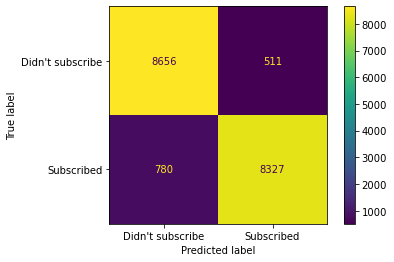

In [174]:
lda = LDA(n_components=1)
sm = SMOTE(random_state=42)
x = df2.drop('y',axis=1).copy()
y = df2['y'].copy()
x_encoded=pd.get_dummies(x,columns=['job','marital','education','default','housing'
                           ,'loan','contact','month','day_of_week','poutcome'],drop_first=True)
X_sm, y_sm = sm.fit_resample(x_encoded,y)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)
X_train_lda=lda.fit_transform(X_train_scaled_sm,y_train_sm)
X_train_lda.shape
X_test_lda=lda.transform(X_test_scaled_sm)
logmodel = LogisticRegression()
logmodel.fit(X_test_lda,y_test_sm)
predict = logmodel.predict(X_test_lda)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_lda,y_train_sm)
pred = clf.predict(X_test_lda)
print(classification_report(y_test_sm,pred))
print(confusion_matrix(y_test_sm,pred))
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_lda,y_train_sm)

plot_confusion_matrix(clf_svm,X_test_lda,y_test_sm,values_format='d',
                      display_labels=["Didn't subscribe","Subscribed"])
pred=clf_svm.predict(X_test_lda)
print(classification_report(y_test_sm,pred))

rf = RandomForestClassifier()
rf.fit(X_train_lda,y_train_sm)
predict_rf = rf.predict(X_test_lda)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_lda,y_train_sm)
predict_tree = tree_model.predict(X_test_lda)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))

xgb=XGBClassifier()
xgb.fit(X_train_lda,y_train_sm)
predict_xgb = xgb.predict(X_test_lda)
print(classification_report(y_test_sm,predict_xgb))
print(confusion_matrix(y_test_sm,predict_xgb))

# LDA using SMOTE  CHI and uncorrelated features 

In [282]:
lda = LDA(n_components=1)
sm = SMOTE(random_state=42)
x_chi = df2.drop('y',axis=1).copy()
x_chi = x_chi.drop('housing',axis=1).copy()
x_chi = x_chi.drop('loan',axis=1).copy()
x_chi = x_chi.drop('euribor3m',axis=1).copy()
x_chi = x_chi.drop('nr.employed',axis=1).copy()
x_chi = x_chi.drop('emp.var.rate',axis=1).copy()
y_chi = df2['y'].copy()

x_encoded_chi=pd.get_dummies(x_chi,columns=['job','marital','education','default'
                                    ,'contact','month','day_of_week','poutcome'],drop_first=True)


X_sm, y_sm = sm.fit_resample(x_encoded_chi,y_chi)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)
X_train_lda=lda.fit_transform(X_train_scaled_sm,y_train_sm)
X_train_lda.shape
X_test_lda=lda.transform(X_test_scaled_sm)



In [284]:
logmodel = LogisticRegression()
logmodel.fit(X_test_lda,y_test_sm)
predict = logmodel.predict(X_test_lda)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
print("AUC:",roc_auc_score(y_test_sm,predict))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.94      0.92      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8584  583]
 [ 704 8403]]
AUC: 0.9295495696300323


In [285]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_lda,y_train_sm)
pred = clf.predict(X_test_lda)
print(classification_report(y_test_sm,pred))
print(confusion_matrix(y_test_sm,pred))
print("AUC:",roc_auc_score(y_test_sm,pred))


              precision    recall  f1-score   support

           0       0.91      0.93      0.92      9167
           1       0.93      0.91      0.92      9107

    accuracy                           0.92     18274
   macro avg       0.92      0.92      0.92     18274
weighted avg       0.92      0.92      0.92     18274

[[8497  670]
 [ 796 8311]]
AUC: 0.9197532280158218


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.94      0.92      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

AUC: 0.9297436670070957


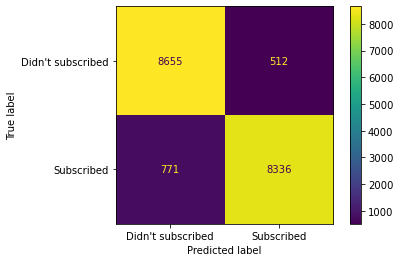

In [287]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_lda,y_train_sm)

plot_confusion_matrix(clf_svm,X_test_lda,y_test_sm,values_format='d',
                      display_labels=["Didn't subscribed","Subscribed"])
pred=clf_svm.predict(X_test_lda)
print(classification_report(y_test_sm,pred))
print("AUC:",roc_auc_score(y_test_sm,pred))

In [289]:
rf = RandomForestClassifier()
rf.fit(X_train_lda,y_train_sm)
predict_rf = rf.predict(X_test_lda)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
print("AUC:",roc_auc_score(y_test_sm,predict_rf))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.94      0.92      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8584  583]
 [ 704 8403]]
AUC: 0.8935622221821079


In [291]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_lda,y_train_sm)
predict_tree = tree_model.predict(X_test_lda)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
print("AUC:",roc_auc_score(y_test_sm,predict_tree))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.94      0.92      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8584  583]
 [ 704 8403]]
AUC: 0.8935073193601031


In [292]:
xgb=XGBClassifier()
xgb.fit(X_train_lda,y_train_sm)
predict_xgb = xgb.predict(X_test_lda)
print(classification_report(y_test_sm,predict_xgb))
print(confusion_matrix(y_test_sm,predict_xgb))
print("AUC:",roc_auc_score(y_test_sm,predict_xgb))

/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:56:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.94      0.92      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8623  544]
 [ 761 8346]]
AUC: 0.9285473041504582


# Removing correlated features using smote 

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      9167
           1       0.94      0.93      0.94      9107

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274

[[8648  519]
 [ 641 8466]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.94      0.91      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8630  537]
 [ 776 8331]]


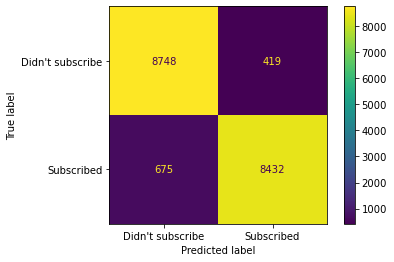

In [175]:
x = df2.drop('y',axis=1).copy()
x = x.drop('euribor3m',axis=1).copy()
x = x.drop('nr.employed',axis=1).copy()
x = x.drop('emp.var.rate',axis=1).copy()
x = x.drop('housing',axis=1).copy()
x = x.drop('loan',axis=1).copy()
y = df2['y'].copy()
x_encoded=pd.get_dummies(x,columns=['job','marital','education','default'
                                    ,'contact','month','day_of_week','poutcome'],drop_first=True)
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(x_encoded,y)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)
logmodel = LogisticRegression()
logmodel.fit(X_test_scaled_sm,y_test_sm)
predict = logmodel.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_scaled_sm,y_train_sm)
pred = clf.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,pred))
print(confusion_matrix(y_test_sm,pred))
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled_sm,y_train_sm)

plot_confusion_matrix(clf_svm,X_test_scaled_sm,y_test_sm,values_format='d',
                      display_labels=["Didn't subscribe","Subscribed"])

In [146]:
rf = RandomForestClassifier()
rf.fit(X_test_scaled_sm,y_test_sm)
predict_rf = rf.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))

tree_model = DecisionTreeClassifier()
tree_model.fit(X_test_scaled_sm,y_test_sm)
predict_tree = tree_model.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))

xgb=XGBClassifier()
xgb.fit(X_test_scaled_sm,y_test_sm)
predict_xgb = xgb.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict_xgb))
print(confusion_matrix(y_test_sm,predict_xgb))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      9167
           1       0.94      0.92      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8671  496]
 [ 731 8376]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      9167
           1       0.94      0.92      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8671  496]
 [ 731 8376]]
[13:16:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to r

/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9167
           1       0.99      0.99      0.99      9107

    accuracy                           0.99     18274
   macro avg       0.99      0.99      0.99     18274
weighted avg       0.99      0.99      0.99     18274

[[9066  101]
 [ 133 8974]]


# PCA removing the correlated features 

In [147]:
pca = PCA(n_components=40,whiten='True',random_state=42)
x=pca.fit(x_encoded).transform(x_encoded)
pca.explained_variance_ratio_
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(x_encoded,y)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      9167
           1       0.94      0.93      0.94      9107

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274

[[8648  519]
 [ 641 8466]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.94      0.91      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8630  537]
 [ 776 8331]]


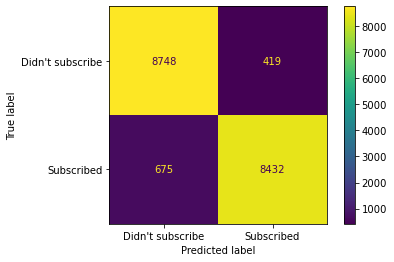

In [176]:
logmodel = LogisticRegression()
logmodel.fit(X_test_scaled_sm,y_test_sm)
predict = logmodel.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_scaled_sm,y_train_sm)
pred = clf.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,pred))
print(confusion_matrix(y_test_sm,pred))
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled_sm,y_train_sm)

plot_confusion_matrix(clf_svm,X_test_scaled_sm,y_test_sm,values_format='d',
                      display_labels=["Didn't subscribe","Subscribed"])

# LDA removing the correlated features CHI

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      9167
           1       0.93      0.91      0.92      9107

    accuracy                           0.92     18274
   macro avg       0.92      0.92      0.92     18274
weighted avg       0.92      0.92      0.92     18274

[[8585  582]
 [ 810 8297]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      9167
           1       0.93      0.90      0.91      9107

    accuracy                           0.91     18274
   macro avg       0.91      0.91      0.91     18274
weighted avg       0.91      0.91      0.91     18274

[[8522  645]
 [ 931 8176]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      9167
           1       0.94      0.90      0.92      9107

    accuracy                           0.92     18274
   macro avg       0.92      0.92      0.92     18274
weighted avg       0

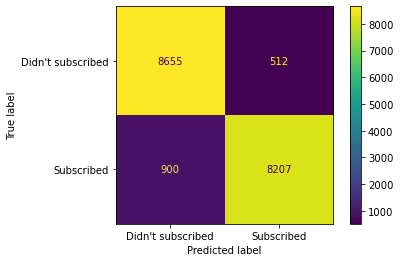

In [149]:
lda = LDA(n_components=1)
sm = SMOTE(random_state=42)
x = df2.drop('y',axis=1).copy()
x = x.drop('euribor3m',axis=1).copy()
x = x.drop('nr.employed',axis=1).copy()
x = x.drop('emp.var.rate',axis=1).copy()
x = x.drop('housing',axis=1).copy()
x = x.drop('loan',axis=1).copy()
y = df2['y'].copy()
x_encoded=pd.get_dummies(x,columns=['job','marital','education','default'
                           ,'contact','month','day_of_week','poutcome'],drop_first=True)
X_sm, y_sm = sm.fit_resample(x_encoded,y)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)
X_train_lda=lda.fit_transform(X_train_scaled_sm,y_train_sm)
X_train_lda.shape
X_test_lda=lda.transform(X_test_scaled_sm)
logmodel = LogisticRegression()
logmodel.fit(X_test_lda,y_test_sm)
predict = logmodel.predict(X_test_lda)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_lda,y_train_sm)
pred = clf.predict(X_test_lda)
print(classification_report(y_test_sm,pred))
print(confusion_matrix(y_test_sm,pred))
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_lda,y_train_sm)

plot_confusion_matrix(clf_svm,X_test_lda,y_test_sm,values_format='d',
                      display_labels=["Didn't subscribed","Subscribed"])
pred=clf_svm.predict(X_test_lda)
print(classification_report(y_test_sm,pred))

# Hyper tuning under sampling don't run

doing hyper parameters with smote doesnt work as it takes too long 

In [ ]:
undersample = RandomUnderSampler()
steps = [("u",undersample)]
pipeline = Pipeline(steps=steps)
x = df2.drop('y',axis=1).copy()
x = x.drop('housing',axis=1).copy()
x = x.drop('loan',axis=1).copy()
x = x.drop('euribor3m',axis=1).copy()
x = x.drop('nr.employed',axis=1).copy()
x = x.drop('emp.var.rate',axis=1).copy()
y = df2['y'].copy()
x_encoded=pd.get_dummies(x,columns=['job','marital','education','default'
                           ,'contact','month','day_of_week','poutcome'],drop_first=True)
X,y=pipeline.fit_resample(x_encoded,y)
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
param_grid = [{'C':[0.5,1,10,100],
               'gamma':['scale',1,0.1,0.01,0.001,0.0001],
               'kernel':['rbf']},]

optimal_params = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=0)
optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)
#now 
clf_svm = SVC(random_state=42,C=100,gamma=0.001)
clf_svm.fit(X_train_scaled,y_train)

plot_confusion_matrix(clf_svm,X_test_scaled,y_test,values_format='d',
                      display_labels=["Didn't subscribed","Subscribed"])



In [ ]:
pred=clf_svm.predict(X_test_scaled)
print(classification_report(y_test,pred))

In [ ]:
##### logmodel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
clf = GridSearchCV(logmodel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_test_scaled,y_test)
predict = best_clf.predict(X_test_scaled)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

In [ ]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
best_model = clf.fit(X_test_scaled,y_test)
predict = best_clf.predict(X_test_scaled)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

# Hyper tuning downsampling 

In [ ]:
df_no = df2[df2['y']==0]
df_yes = df2[df2['y']==1]

df_no_downsampled = resample(df_no,
                                     replace=False,
                                      n_samples=4640,
                                      random_state=42) 
#above here we are downsampling the people who didn't default 
df_yes_downsampled = resample(df_yes,
                                      replace=False,
                                      n_samples=4640,
                                      random_state=42) 
df_downsample = pd.concat([df_no,df_yes])


In [ ]:
x = df_downsample.drop('y',axis=1).copy()
y = df_downsample['y'].copy()
print(x.columns)

In [ ]:
x = x.drop('housing',axis=1).copy()
x = x.drop('loan',axis=1).copy()
x = x.drop('euribor3m',axis=1).copy()
x = x.drop('nr.employed',axis=1).copy()
x = x.drop('emp.var.rate',axis=1).copy()

In [ ]:
x_encoded=pd.get_dummies(x,columns=['job','marital','education','default'
                           ,'contact','month','day_of_week','poutcome'],drop_first=True)
X_train, X_test,y_train,y_test = train_test_split(x_encoded,y,random_state=42)

In [ ]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
param_grid = [{'C':[0.5,1,10,100],
               'gamma':['scale',1,0.1,0.01,0.001,0.0001],
               'kernel':['rbf']},]

optimal_params = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=0)
optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)
#now 
clf_svm = SVC(random_state=42,C=100,gamma=0.001)
clf_svm.fit(X_train_scaled,y_train)

plot_confusion_matrix(clf_svm,X_test_scaled,y_test,values_format='d',
                      display_labels=["Didn't subscribed","Subscribed"])
pred=clf_svm.predict(X_test_scaled)
print(classification_report(y_test,pred))


In [ ]:
logmodel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
clf = GridSearchCV(logmodel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_test_scaled,y_test)
predict = best_clf.predict(X_test_scaled)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
best_model = clf.fit(X_test_scaled,y_test)
predict = best_clf.predict(X_test_scaled)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

# Implementing the final model with PCA and hyperparameters 

In [150]:
x = df2.drop('y',axis=1).copy()
#x = x.drop('housing',axis=1).copy()
#x = x.drop('loan',axis=1).copy()
#x = x.drop('euribor3m',axis=1).copy()
#x = x.drop('nr.employed',axis=1).copy()
#x = x.drop('emp.var.rate',axis=1).copy() 
y = df2['y'].copy()
x_encoded=pd.get_dummies(x,columns=['job','marital','education','default'
                           ,'contact','month','day_of_week','poutcome','housing','loan'],drop_first=True)

x_encoded
sm = SMOTE(random_state=42)
pca = PCA(n_components=45,random_state=42)
X_sm, y_sm = sm.fit_resample(x_encoded,y)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)
pca.fit(X_test_scaled_sm)
pca.explained_variance_ratio_



array([0.09759715, 0.04334096, 0.0401006 , 0.03778705, 0.03342398,
       0.03209297, 0.02963245, 0.02865633, 0.02791812, 0.02640001,
       0.02423071, 0.02275305, 0.02261417, 0.02226161, 0.02188415,
       0.0210124 , 0.02078977, 0.02031446, 0.02021486, 0.01989474,
       0.01985257, 0.01957189, 0.01930207, 0.01914301, 0.01902723,
       0.01880551, 0.01875448, 0.01859097, 0.01811737, 0.01792058,
       0.01767066, 0.01690394, 0.01643632, 0.01561045, 0.01466706,
       0.01397115, 0.01351063, 0.01229721, 0.0110804 , 0.01077746,
       0.00937177, 0.00845782, 0.00683145, 0.00627446, 0.00559657])

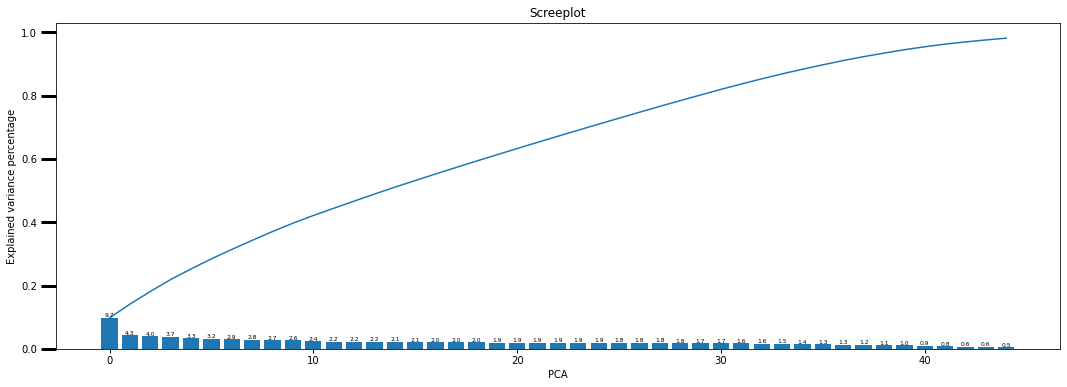

In [151]:
num_components = len(pca.explained_variance_ratio_)
index=np.arange(num_components)

values = pca.explained_variance_ratio_

#define the graph
plt.figure(figsize=(18,6))
ax=plt.subplot(111)
cumulative = np.cumsum(values)
ax.bar(index,values)
ax.plot(index,cumulative)
for val in range(num_components):
    ax.annotate(r"%s"%((str(values[val]*100)[:3])),(index[val],values[val]),
    va = 'bottom', ha='center',fontsize=6)
    ax.xaxis.set_tick_params(width=1)
    ax.yaxis.set_tick_params(width=3,length=15)
    ax.set_xlabel("PCA")
    ax.set_ylabel("Explained variance percentage")
    plt.title('Screeplot')

In [152]:
x = df2.drop('y',axis=1).copy()
#x = x.drop('housing',axis=1).copy()
#x = x.drop('loan',axis=1).copy()
#x = x.drop('euribor3m',axis=1).copy()
#x = x.drop('nr.employed',axis=1).copy()
#x = x.drop('emp.var.rate',axis=1).copy() 
y = df2['y'].copy()
x_encoded=pd.get_dummies(x,columns=['job','marital','education','default'
                           ,'contact','month','day_of_week','poutcome','housing','loan'],drop_first=True)

x_encoded
sm = SMOTE(random_state=42)
pca = PCA(n_components=45,random_state=42)
X_sm, y_sm = sm.fit_resample(x_encoded,y)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)
pca.fit(X_test_scaled_sm)
pca.explained_variance_ratio_




array([0.09759715, 0.04334096, 0.0401006 , 0.03778705, 0.03342398,
       0.03209297, 0.02963245, 0.02865633, 0.02791812, 0.02640001,
       0.02423071, 0.02275305, 0.02261417, 0.02226161, 0.02188415,
       0.0210124 , 0.02078977, 0.02031446, 0.02021486, 0.01989474,
       0.01985257, 0.01957189, 0.01930207, 0.01914301, 0.01902723,
       0.01880551, 0.01875448, 0.01859097, 0.01811737, 0.01792058,
       0.01767066, 0.01690394, 0.01643632, 0.01561045, 0.01466706,
       0.01397115, 0.01351063, 0.01229721, 0.0110804 , 0.01077746,
       0.00937177, 0.00845782, 0.00683145, 0.00627446, 0.00559657])

In [153]:
from sklearn.preprocessing import StandardScaler

features = ['euribor3m', 'nr.employed','emp.var.rate']

x_pca = df2.loc[:, features].values
x_pca = StandardScaler().fit_transform(x_pca)

In [154]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x_pca)
principalDF = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2'])

In [155]:
pca.components_

array([[-0.58430607, -0.57099714, -0.57667034],
       [ 0.1679167 , -0.7802817 ,  0.60246531]])

In [156]:
pca.explained_variance_ratio_

array([0.96105523, 0.03210655])

In [157]:
df2 = pd.concat([principalDF, df2], axis=1)

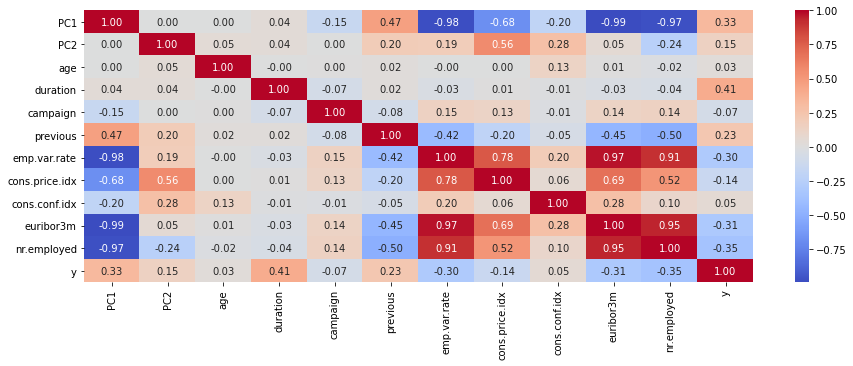

In [158]:
plt.figure(figsize=(15,5))
sns.heatmap(df2.corr(), annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

In [313]:
x = df2.drop('y',axis=1).copy()
x = x.drop('housing',axis=1).copy()
x = x.drop('loan',axis=1).copy()
x = x.drop('euribor3m',axis=1).copy()
x = x.drop('nr.employed',axis=1).copy()
x = x.drop('emp.var.rate',axis=1).copy()
x = x.drop('PC2',axis=1).copy()
y = df2['y'].copy()
x_encoded=pd.get_dummies(x,columns=['job','marital','education','default'
                           ,'contact','month','day_of_week','poutcome',],drop_first=True)
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(x_encoded,y)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)

logmodel = LogisticRegression()
logmodel.fit(X_test_scaled_sm,y_test_sm)
predict = logmodel.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
print("AUC:",roc_auc_score(y_test_sm,predict))



              precision    recall  f1-score   support

           0       0.93      0.94      0.94      9167
           1       0.94      0.93      0.94      9107

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274

[[8649  518]
 [ 642 8465]]
AUC: 0.9364988702188682


In [314]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_scaled_sm,y_train_sm)
pred = clf.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,pred))
print(confusion_matrix(y_test_sm,pred))
print("AUC:",roc_auc_score(y_test_sm,pred))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.94      0.91      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8641  526]
 [ 790 8317]]
AUC: 0.9279369047929487


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      9167
           1       0.95      0.93      0.94      9107

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274

AUC: 0.9405802874325337


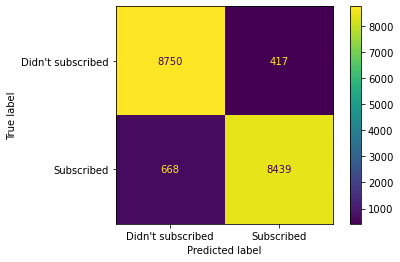

In [315]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled_sm,y_train_sm)

plot_confusion_matrix(clf_svm,X_test_scaled_sm,y_test_sm,values_format='d',
                      display_labels=["Didn't subscribed","Subscribed"])
pred=clf_svm.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,pred))
print("AUC:",roc_auc_score(y_test_sm,pred))

In [319]:
rf = RandomForestClassifier()
rf.fit(X_test_scaled_sm,y_test_sm)
predict_rf = rf.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
print("AUC:",roc_auc_score(y_test_sm,predict_rf))



              precision    recall  f1-score   support

           0       0.93      0.94      0.94      9167
           1       0.94      0.93      0.94      9107

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274

[[8649  518]
 [ 642 8465]]
AUC: 1.0


In [320]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_test_scaled_sm,y_test_sm)
predict_tree = tree_model.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))
print("AUC:",roc_auc_score(y_test_sm,predict_tree))



              precision    recall  f1-score   support

           0       0.93      0.94      0.94      9167
           1       0.94      0.93      0.94      9107

    accuracy                           0.94     18274
   macro avg       0.94      0.94      0.94     18274
weighted avg       0.94      0.94      0.94     18274

[[8649  518]
 [ 642 8465]]
AUC: 1.0


In [321]:
xgb=XGBClassifier()
xgb.fit(X_test_scaled_sm,y_test_sm)
predict_xgb = xgb.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict_xgb))
print(confusion_matrix(y_test_sm,predict_xgb))
print("AUC:",roc_auc_score(y_test_sm,predict_xgb))

/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9167
           1       0.99      0.99      0.99      9107

    accuracy                           0.99     18274
   macro avg       0.99      0.99      0.99     18274
weighted avg       0.99      0.99      0.99     18274

[[9067  100]
 [  92 9015]]
AUC: 0.9894945932608851


# Random search and grid don't run

In [ ]:
import scipy

lr_dist = {}
lr_dist["C"] = scipy.stats.expon(scale=.01)
lr_dist["fit_intercept"] =  [True, False]
lr_dist["warm_start"] = [True,False]
lr_dist["random_state"] = [1]
lr_dist['class_weight'] = ["balanced"]
logmodel = LogisticRegression(solver='saga', max_iter=5000)

In [ ]:
logmodel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [3500, 5000]
    }
]
clf = GridSearchCV(logmodel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_test_scaled_sm,y_test_sm)
predict = best_clf.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))

In [ ]:
param_grid = {
    "n_neighbors": [i for i in range(1,30,5)],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1, 10, 30],
    "p": [1,2]
}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_test_scaled_sm,y_test_sm)
predict = best_clf.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))

In [ ]:
param_grid = {
    "C": [0.5,1,10,100],
    "gamma": [0, .01, .1, 1, 5, 10],
    "kernel": ["rbf"],
    "random_state": [1]
}
clf = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=0)
best_clf=clf.fit(X_test_scaled_sm,y_test_sm)
#now 
predict = best_clf.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict))
print(confusion_matrix(y_test_sm,predict))

# RUN

In [161]:
x = df2.drop('y',axis=1).copy()
x = x.drop('housing',axis=1).copy()
x = x.drop('loan',axis=1).copy()
x = x.drop('euribor3m',axis=1).copy()
x = x.drop('nr.employed',axis=1).copy()
x = x.drop('emp.var.rate',axis=1).copy()
x = x.drop('PC2',axis=1).copy()
y = df2['y'].copy()
x_encoded=pd.get_dummies(x,columns=['job','marital','education','default'
                           ,'contact','month','day_of_week','poutcome',],drop_first=True)
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(x_encoded,y)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)

# Random search

In [163]:
from scipy.stats import reciprocal, uniform
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(DecisionTreeClassifier(), params,  n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_sm, y_train_sm)
print("DT - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("DT - Best Parameters : ",random_search_cv.best_estimator_)

param_dist = dict(n_neighbors=range(1, 31), weights=['uniform', 'distance'])
random_search_cv = RandomizedSearchCV(KNeighborsClassifier(),param_distributions=param_dist, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_sm, y_train_sm)
print("KNN - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("KNN - Best Parameters : ",random_search_cv.best_estimator_)
                                                                   

penalty = ['l1', 'l2']
C = uniform(loc=0, scale=4)
hyperparameters = dict(C=C, penalty=penalty)
random_search_cv = RandomizedSearchCV(LogisticRegression(), hyperparameters, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_sm, y_train_sm)
print("LR Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("LR Parameters : ",random_search_cv.best_estimator_)                                                                     
                                                                     
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_sm, y_train_sm)
print("RF Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("RF Parameters : ",random_search_cv.best_estimator_)

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter
random_search_cv = RandomizedSearchCV(SVC(), param_distributions, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_sm, y_train_sm)
print("SVM  Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("SVM - Best Parameters : ",random_search_cv.best_estimator_)

params = {'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=2)
random_search_cv.fit(X_train_scaled_sm, y_train_sm)
print("XGB Score : ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("XGB Parameters : ",random_search_cv.best_estimator_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] min_samples_split=2, max_leaf_nodes=36, max_depth=15 ............
[CV]  min_samples_split=2, max_leaf_nodes=36, max_depth=15, total=   0.2s
[CV] min_samples_split=2, max_leaf_nodes=36, max_depth=15 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  min_samples_split=2, max_leaf_nodes=36, max_depth=15, total=   0.2s
[CV] min_samples_split=2, max_leaf_nodes=36, max_depth=15 ............
[CV]  min_samples_split=2, max_leaf_nodes=36, max_depth=15, total=   0.1s
[CV] min_samples_split=2, max_leaf_nodes=49, max_depth=25 ............
[CV]  min_samples_split=2, max_leaf_nodes=49, max_depth=25, total=   0.2s
[CV] min_samples_split=2, max_leaf_nodes=49, max_depth=25 ............
[CV]  min_samples_split=2, max_leaf_nodes=49, max_depth=25, total=   0.2s
[CV] min_samples_split=2, max_leaf_nodes=49, max_depth=25 ............
[CV]  min_samples_split=2, max_leaf_nodes=49, max_depth=25, total=   0.2s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.0s finished


DT - Best Score :   0.9142315128962825
{'min_samples_split': 2, 'max_leaf_nodes': 49, 'max_depth': 25}
DT - Best Parameters :  DecisionTreeClassifier(max_depth=25, max_leaf_nodes=49)
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] weights=uniform, n_neighbors=1 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... weights=uniform, n_neighbors=1, total=  41.1s
[CV] weights=uniform, n_neighbors=1 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.1s remaining:    0.0s


[CV] ................... weights=uniform, n_neighbors=1, total=  40.7s
[CV] weights=uniform, n_neighbors=1 ..................................
[CV] ................... weights=uniform, n_neighbors=1, total=  42.6s
[CV] weights=distance, n_neighbors=3 .................................
[CV] .................. weights=distance, n_neighbors=3, total=  42.8s
[CV] weights=distance, n_neighbors=3 .................................
[CV] .................. weights=distance, n_neighbors=3, total=  43.1s
[CV] weights=distance, n_neighbors=3 .................................
[CV] .................. weights=distance, n_neighbors=3, total=  43.4s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.2min finished


KNN - Best Score :   0.9291160483017767
{'weights': 'distance', 'n_neighbors': 3}
KNN - Best Parameters :  KNeighborsClassifier(n_neighbors=3, weights='distance')
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=1.49816047538945, penalty=l1 ..................................
[CV] ................... C=1.49816047538945, penalty=l1, total=   0.0s
[CV] C=1.49816047538945, penalty=l1 ..................................
[CV] ................... C=1.49816047538945, penalty=l1, total=   0.0s
[CV] C=1.49816047538945, penalty=l1 ..................................
[CV] ................... C=1.49816047538945, penalty=l1, total=   0.0s
[CV] C=0.7337391594646552, penalty=l2 ................................
[CV] ................. C=0.7337391594646552, penalty=l2, total=   0.1s
[CV] C=0.7337391594646552, penalty=l2 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warning

[CV] ................. C=0.7337391594646552, penalty=l2, total=   0.2s
[CV] C=0.7337391594646552, penalty=l2 ................................
[CV] ................. C=0.7337391594646552, penalty=l2, total=   0.1s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LR Best Score :   0.9363029440735472
{'C': 0.7337391594646552, 'penalty': 'l2'}
LR Parameters :  LogisticRegression(C=0.7337391594646552)
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] min_samples_split=2, max_leaf_nodes=36, max_depth=15 ............
[CV]  min_samples_split=2, max_leaf_nodes=36, max_depth=15, total=   2.3s
[CV] min_samples_split=2, max_leaf_nodes=36, max_depth=15 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  min_samples_split=2, max_leaf_nodes=36, max_depth=15, total=   2.3s
[CV] min_samples_split=2, max_leaf_nodes=36, max_depth=15 ............
[CV]  min_samples_split=2, max_leaf_nodes=36, max_depth=15, total=   2.3s
[CV] min_samples_split=2, max_leaf_nodes=49, max_depth=25 ............
[CV]  min_samples_split=2, max_leaf_nodes=49, max_depth=25, total=   2.2s
[CV] min_samples_split=2, max_leaf_nodes=49, max_depth=25 ............
[CV]  min_samples_split=2, max_leaf_nodes=49, max_depth=25, total=   2.2s
[CV] min_samples_split=2, max_leaf_nodes=49, max_depth=25 ............
[CV]  min_samples_split=2, max_leaf_nodes=49, max_depth=25, total=   2.4s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.7s finished


RF Score :   0.9220203567910693
{'min_samples_split': 2, 'max_leaf_nodes': 49, 'max_depth': 25}
RF Parameters :  RandomForestClassifier(max_depth=25, max_leaf_nodes=49)
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total= 2.2min
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total= 1.7min
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total= 1.7min
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=  42.6s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=  44.2s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=  43.8s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.7min finished


SVM  Score :   0.9398051876983692
{'C': 8.31993941811405, 'gamma': 0.015751320499779724}
SVM - Best Parameters :  SVC(C=8.31993941811405, gamma=0.015751320499779724)
[13:46:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:46:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:47:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:47:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:47:28] WARNING: /Users/runner/miniforge3/cond

In [171]:
print("Classification report for Decision Tree")
tree_model = DecisionTreeClassifier(min_samples_split=2,max_leaf_nodes = 49,max_depth=25)
tree_model.fit(X_train_scaled_sm, y_train_sm)
predict_tree = tree_model.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict_tree))
print(confusion_matrix(y_test_sm,predict_tree))

print(" - - - - - - - - - - - - - - - - - - - ")

print("Classification report for knn")
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X_train_scaled_sm, y_train_sm)
predict_knn = knn.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict_knn))
print(confusion_matrix(y_test_sm,predict_knn))

print(" - - - - - - - - - - - - - - - - - - - ")


print("Classification report for Logistic Regression")
logmodel = LogisticRegression(C=0.7337391594646552, penalty='l2')
logmodel.fit(X_train_scaled_sm, y_train_sm)
predict_log = logmodel.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict_log))
print(confusion_matrix(y_test_sm,predict_log))

print(" - - - - - - - - - - - - - - - - - - - ")


print("Classification report for SVM")
clf_svm = SVC(C=8.31993941811405,gamma=0.015751320499779724)
clf_svm.fit(X_train_scaled_sm,y_train_sm)
predict_svm = clf_svm.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict_svm))
print(confusion_matrix(y_test_sm,predict_svm))

print(" - - - - - - - - - - - - - - - - - - - ")


print("Classification report for Random Forest Classifier")
rf = RandomForestClassifier(min_samples_split=2,max_leaf_nodes= 49, max_depth=25)
rf.fit(X_train_scaled_sm,y_train_sm)
predict_rf = rf.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict_rf))
print(confusion_matrix(y_test_sm,predict_rf))

print(" - - - - - - - - - - - - - - - - - - - ")



print("Classification report for xGB boost")
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=25, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb.fit(X_train_scaled_sm, y_train_sm)
predict_xgb = xgb.predict(X_test_scaled_sm)
print(classification_report(y_test_sm,predict_xgb))
print(confusion_matrix(y_test_sm,predict_xgb))



Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      9167
           1       0.78      0.93      0.85      9107

    accuracy                           0.84     18274
   macro avg       0.85      0.84      0.84     18274
weighted avg       0.85      0.84      0.84     18274

[[6787 2380]
 [ 595 8512]]
 - - - - - - - - - - - - - - - - - - - 
Classification report for knn
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9167
           1       0.94      0.92      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8606  561]
 [ 727 8380]]
 - - - - - - - - - - - - - - - - - - - 
Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.94      0.

/Users/mrceo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      9167
           1       0.89      0.97      0.93      9107

    accuracy                           0.93     18274
   macro avg       0.93      0.93      0.93     18274
weighted avg       0.93      0.93      0.93     18274

[[8120 1047]
 [ 298 8809]]
